#Predicting Investment Success: Unlocking Startup Potential

##Problem Statment
Problem Definition: The project seeks to aid venture capitalists (VCs) and investors in making informed decisions by predicting the success of startups. Success might be defined by factors like growth, profitability, acquisition, or other key performance indicators (KPIs).

##Data Collection:
While the notebook doesn't explicitly detail the data collection process, it operates on a dataset of startups, presumably containing features like funding rounds, industry categories, founding dates, locations, and potentially many others

##Data Wireframe

##Data Exploration

In [35]:
import pandas as pd
from matplotlib import pyplot as plt
# Load the dataset
# If you're running this code in an environment other than Google Colab,
from google.colab import files
uploaded = files.upload()

data = pd.read_csv('startup data.csv')

# Display the first few rows of the dataset
data

Saving startup data.csv to startup data (1).csv


Unnamed: 0 state_code   latitude   longitude        zip_code        id  \
0          1005         CA  42.358880  -71.056820           92101    c:6669   
1           204         CA  37.238916 -121.973718           95032   c:16283   
2          1001         CA  32.901049 -117.192656           92121   c:65620   
3           738         CA  37.320309 -122.050040           95014   c:42668   
4          1002         CA  37.779281 -122.419236           94105   c:65806   
5           379         CA  37.406914 -122.090370           94043   c:22898   
6           195         CA  37.391559 -122.070264           94041   c:16191   
7           875         CA  38.057107 -122.513742           94901    c:5192   
8            16         MA  42.712207  -73.203599            1267    c:1043   
9           846         CA  37.427235 -122.145783           94306     c:498   
10          685         CA  37.442988 -122.162413           94025    c:3949   
11          835         CA  37.452992 -122.185098           94025    c:4829   
12          531         KY  38.241467  -85.724511           40204   c:30290   
13          137         NY  40.702760  -73.986668           11201    c:1491   
14          162         CO  39.746273 -104.991157           80202   c:15645   
15          898         VA  38.901301  -77.265158           22182   c:54177   
16          235         CA  37.396283 -122.105531           94022   c:16770   
17           25         CA  37.590339 -122.341715           94010     c:107   
18          858         NY  40.730646  -73.986614           10004   c:50727   
19          454         CA  37.446411 -122.160540           94301   c:26368   
20          369         TX  30.235040  -97.800130           78735   c:22291   
21          289         WA  47.602605 -122.284865           98122   c:17857   
22          177         CA  37.426316 -122.141082           94306   c:15888   
23           26         CA  37.764395 -122.401024           94103   c:10751   
24          803         CO  40.010492 -105.276843           80302     c:458   
25          797         IL  41.875555  -87.624421           60601   c:45525   
26          572         CA  37.429676 -122.108548           94303    c:3193   
27          503         CA  37.870102 -122.268136           94704   c:28456   
28          642         TX  30.265344  -97.743586           78701   c:36920   
29          625         CA  33.708708 -117.852069           92705   c:35712   
30          355         CA  37.422859 -122.045217           94035   c:21492   
31          510         WA  47.603832 -122.330062           98119   c:28768   
32          485         NC  36.002893  -78.904075           27701   c:27741   
33          145         CA  37.779281 -122.419236           94105  c:150658   
34          605         PA  40.441694  -79.990086           15219   c:34338   
35          785         NY  40.739010  -73.997259           10011   c:45111   
36          562         CA  37.791137 -122.391843           94111    c:3178   
37          619         CA  37.404788 -121.940842           95134   c:35402   
38          378         CA  37.779501 -122.394871           94107   c:22856   
39           63         NY  40.755446  -73.980246           10010    c:1224   
40           65         GA  33.756806  -84.392198           30303    c:1234   
41          139         NH  42.995640  -71.454789            3101  c:149809   
42           98         CA  40.015733 -105.275027           94025   c:13733   
43          681         WA  47.636090 -122.327028           98102   c:39106   
44          884         CA  37.404973 -122.032353           94089    c:5306   
45          207         CA  37.368830 -122.036350           94085   c:16303   
46          747         NY  40.730646  -73.986614          100011   c:43188   
47          593         MA  42.375100  -71.105616            2139   c:33507   
48         1010         CA  37.779281 -122.419236           94607   c:68157   
49          403         CA  37.560781 -122.284114      

In [3]:
# Ignoring warnings to make the notebook output cleaner
import warnings
warnings.filterwarnings("ignore")

# This makes sure that the plots are visible and directly below the code cells that produce them
%matplotlib inline

# This helps in viewing the entire DataFrame without any truncation
# which is essential for a comprehensive data analysis
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# Setting the default plot style to 'seaborn'
# It provides more aesthetically pleasing and informative statistical plots
plt.style.use('seaborn')


# Description of the dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

In [ ]:
# Define a list of numeric data types
numeric = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']

# Select columns from the DataFrame 'data' that have numeric data types
# 'data.select_dtypes' filters the columns based on the specified data types in the 'numeric' list
# The resulting DataFrame 'data_num' contains only the numeric columns from 'data'
data_num = data.select_dtypes(include=numeric)

# Display the first three rows of the numeric DataFrame
data_num.head(3)

Unnamed: 0   latitude   longitude  labels  age_first_funding_year  \
0        1005  42.358880  -71.056820       1                  2.2493   
1         204  37.238916 -121.973718       1                  5.1260   
2        1001  32.901049 -117.192656       1                  1.0329   

   age_last_funding_year  age_first_milestone_year  age_last_milestone_year  \
0                 3.0027                    4.6685                   6.7041   
1                 9.9973                    7.0055                   7.0055   
2                 1.0329                    1.4575                   2.2055   

   relationships  funding_rounds  funding_total_usd  milestones  is_CA  is_NY  \
0              3               3             375000           3      1      0   
1              9               4           40100000           1      1      0   
2              5               1            2600000           2      1      0   

   is_MA  is_TX  is_otherstate  is_software  is_web  is_mobile  is_enterprise  \
0      0      0              0            0       0          0              0   
1      0      0              0            0       0          0              1   
2      0      0              0            0       1          0              0   

   is_advertising  is_gamesvideo  is_ecommerce  is_biotech  is_consulting  \
0               0              0             0           0              0   
1               0              0             0           0              0   
2               0              0             0           0              0   

   is_othercategory  has_VC  has_angel  has_roundA  has_roundB  has_roundC  \
0                 1       0          1           0           0           0   
1                 0       1          0           0           1           1   
2                 0       0          0           1           0           0   

   has_roundD  avg_participants  is_top500  
0           0              1.00          0  
1           1              4.75          1  
2           0              4.00          1

In [ ]:
# This command returns an Index object containing the names of all columns in 'data'
data.columns

Index(['Unnamed: 0', 'state_code', 'latitude', 'longitude', 'zip_code', 'id',
       'city', 'Unnamed: 6', 'name', 'labels', 'founded_at', 'closed_at',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'state_code.1', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'object_id', 'has_VC', 'has_angel', 'has_roundA',
       'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants',
       'is_top500', 'status'],
      dtype='object')

###Category Approach presentation  

In [ ]:
# Select columns that have data type 'object' from the DataFrame 'data'
# 'object' usually refers to strings or mixed data types in pandas
# The result is stored in a new DataFrame 'data_cat', which contains only the categorical columns
data_cat = data.select_dtypes(include='object')

# Display the first three rows of the DataFrame 'data_cat'
# This is useful for getting a quick look at the data in these categorical columns
data_cat.head(5)

state_code zip_code       id           city              Unnamed: 6  \
0         CA    92101   c:6669      San Diego                     NaN   
1         CA    95032  c:16283      Los Gatos                     NaN   
2         CA    92121  c:65620      San Diego      San Diego CA 92121   
3         CA    95014  c:42668      Cupertino      Cupertino CA 95014   
4         CA    94105  c:65806  San Francisco  San Francisco CA 94105   

                name founded_at  closed_at first_funding_at last_funding_at  \
0        Bandsintown   1/1/2007        NaN         4/1/2009        1/1/2010   
1          TriCipher   1/1/2000        NaN        2/14/2005      12/28/2009   
2              Plixi  3/18/2009        NaN        3/30/2010       3/30/2010   
3  Solidcore Systems   1/1/2002        NaN        2/17/2005       4/25/2007   
4     Inhale Digital   8/1/2010  10/1/2012         8/1/2010        4/1/2012   

  state_code.1 category_code object_id    status  
0           CA         music    c:6669  acquired  
1           CA    enterprise   c:16283  acquired  
2           CA           web   c:65620  acquired  
3           CA      software   c:42668  acquired  
4           CA   games_video   c:65806    closed

#### **Data** value  Status

In [ ]:
#This code is transforming categorical data
#(the strings 'acquired' and 'closed') into numerical form (1 and 0).
data['status'] = data.status.map({'acquired':1, 'closed':0})

In [ ]:
# the 'status' is converting column of the DataFrame data to integer data type
data['status'].astype(int)

0      1
1      1
2      1
3      1
4      0
5      0
6      1
7      1
8      1
9      1
10     1
11     0
12     0
13     1
14     1
15     0
16     0
17     1
18     1
19     0
20     1
21     0
22     0
23     0
24     0
25     1
26     1
27     1
28     1
29     1
30     0
31     1
32     0
33     1
34     0
35     0
36     0
37     0
38     1
39     1
40     1
41     1
42     0
43     1
44     1
45     1
46     1
47     1
48     1
49     1
50     1
51     1
52     1
53     1
54     1
55     0
56     1
57     1
58     1
59     1
60     0
61     0
62     1
63     0
64     1
65     1
66     0
67     1
68     1
69     1
70     1
71     1
72     1
73     1
74     0
75     0
76     0
77     1
78     1
79     0
80     1
81     0
82     0
83     1
84     1
85     0
86     1
87     0
88     0
89     1
90     1
91     0
92     1
93     1
94     1
95     0
96     1
97     0
98     1
99     0
100    0
101    1
102    1
103    1
104    1
105    0
106    1
107    0
108    1
109    0
110    1
1

#3. Exploratory Data Analysis (EDA)


## Numerical Approach presentation

In [ ]:
# Iterate through each row in the DataFrame 'data'
for index, row in data.iterrows():
  # Check if the values in 'labels' and 'status' columns are different
  if row['labels'] != row ['status']:
    # If the values are different, print the index of the row and the differing values
    print(f"Index: {index}, Labels: {row['labels']}, Status: {row['status']}")

In [ ]:
# Drop the 'labels' column from the DataFrame 'data'
# 'axis=1' specifies that a column (not a row) should be dropped
# 'inplace=True' makes the change permanent in the DataFrame 'data'
data.drop(["labels"], axis=1, inplace=True)

In [36]:
from matplotlib.colors import LinearSegmentedColormap
# Generate a statistical summary of the numerical columns in the DataFrame
# 'include=['float64', 'int64', 'float', 'int']' ensures only numerical data types are included
desNum = data.describe(include=['float64', 'int64', 'float', 'int'])

# Display the statistical summary with a background gradient for better visualization
# The gradient is applied using the 'viridis' colormap
colors = ["green", "darkblue"]
custom_cmap = LinearSegmentedColormap.from_list("custom_viridis", colors)

desNum.T.style.background_gradient(cmap =custom_cmap, low=0.3, high=0.1)

In [ ]:
#The "O" stands for 'object' parameter is crucial here.
desNumcat = data.describe(include=["O"])
desNumcat.T.style.background_gradient(cmap='Reds', low=0.3, high=0.1)

##1.Data Cleaning and Preprocessing


In [ ]:
# Removing irrelevant columns
columns_to_drop = ['Unnamed: 0', 'Unnamed: 6', 'object_id']
data_cleaned = data.drop(columns=columns_to_drop)

# Handling missing values
# Replacing missing values in 'closed_at' with 'Unknown'
data_cleaned['closed_at'] = data_cleaned['closed_at'].fillna('Unknown')

# Replacing missing values in 'age_first_milestone_year' and 'age_last_milestone_year' with the median
age_columns = ['age_first_milestone_year', 'age_last_milestone_year']
data_cleaned[age_columns] = data_cleaned[age_columns].fillna(data_cleaned[age_columns].median())

In [ ]:
# Converting date columns to datetime format
date_columns = ['founded_at', 'first_funding_at', 'last_funding_at']
data_cleaned[date_columns] = data_cleaned[date_columns].apply(pd.to_datetime, errors='coerce')

In [ ]:
# Removing duplicate rows if any
data_cleaned = data_cleaned.drop_duplicates()

# Identifying outliers in a specific column (e.g., 'funding_total_usd')
# Here, we use the IQR method
Q1 = data_cleaned['funding_total_usd'].quantile(0.25)
Q3 = data_cleaned['funding_total_usd'].quantile(0.75)
IQR = Q3 - Q1

# Filtering out outliers
data_cleaned = data_cleaned[~((data_cleaned['funding_total_usd'] < (Q1 - 1.5 * IQR)) |
                              (data_cleaned['funding_total_usd'] > (Q3 + 1.5 * IQR)))]

In [ ]:
# Encoding categorical variables using one-hot encoding
data_cleaned = pd.get_dummies(data_cleaned, columns=['state_code'], drop_first=True)

##2. Feature Engineering

In [ ]:
# Feature Engineering Example: Calculating the duration between founding and first funding
data_cleaned['duration_to_first_funding'] = (data_cleaned['first_funding_at'] - data_cleaned['founded_at']).dt.days

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Creating polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(data_cleaned[['age_first_funding_year', 'age_last_funding_year']])

# Adding these features to the dataframe
data_cleaned = pd.concat([data_cleaned, pd.DataFrame(poly_features)], axis=1)

In [ ]:
# Creating time-based features like 'month' and 'year' from a datetime column
data_cleaned['founded_month'] = data_cleaned['founded_at'].dt.month
data_cleaned['founded_year'] = data_cleaned['founded_at'].dt.year

In [ ]:
# Statistical summary of numerical features
#data_cleaned.describe()
data_cleaned = data.describe(include=['float64', 'int64', 'float', 'int'])

# Display the statistical summary with a background gradient for better visualization
# The gradient is applied using the 'viridis' colormap
data_cleaned.T.style.background_gradient(cmap='Reds', low=0.2, high=0.1)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization Example: Distribution of a numerical feature
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['duration_to_first_funding'], kde=True)
plt.title('Distribution of Duration to First Funding')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.show()

KeyError: 'duration_to_first_funding'

<Figure size 1000x600 with 0 Axes>

Advance

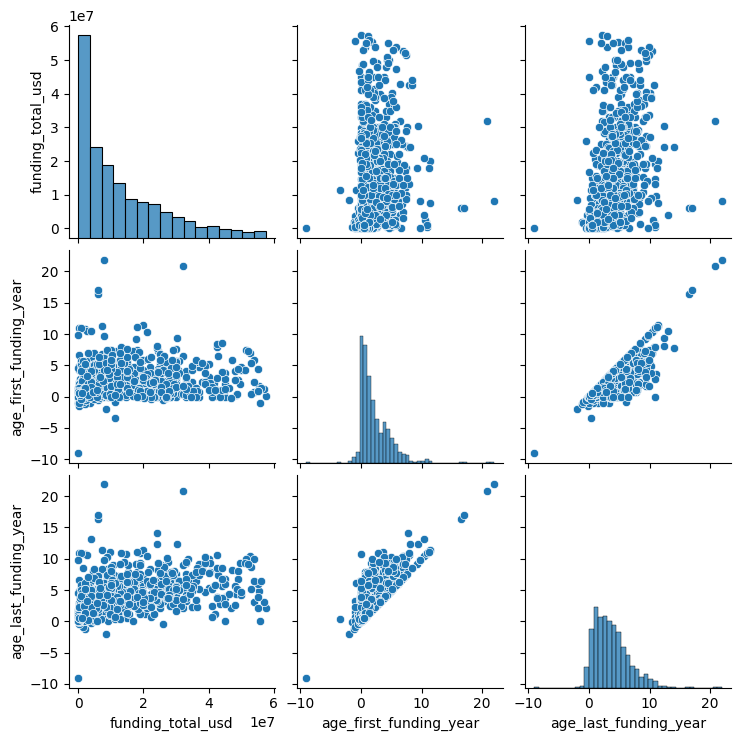

In [ ]:
# Pair plot for selected features
sns.pairplot(data_cleaned[['funding_total_usd', 'age_first_funding_year', 'age_last_funding_year']])
plt.show()

Start from her not

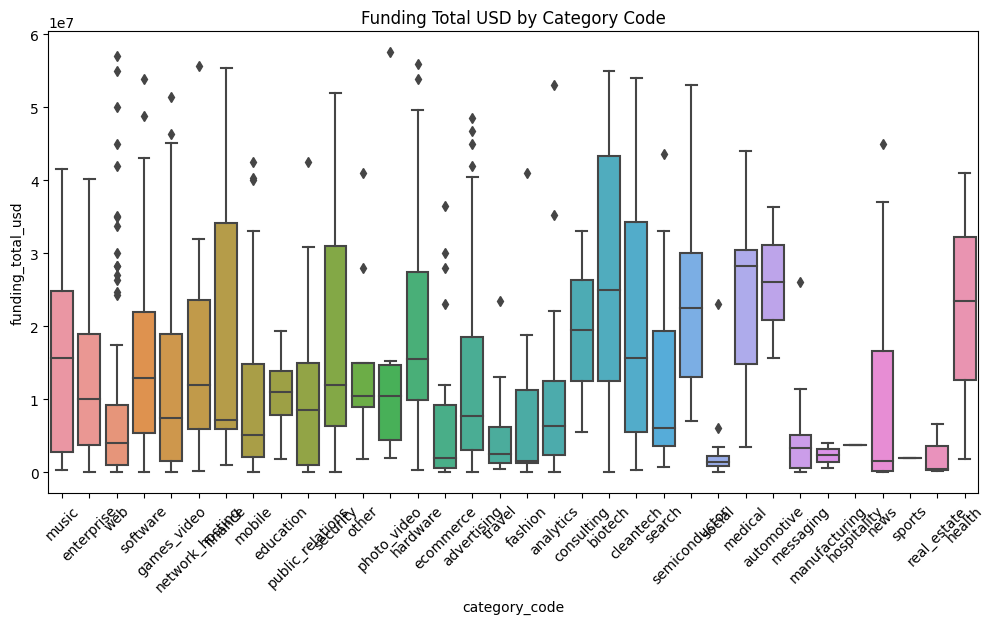

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for comparing 'funding_total_usd' across different categories in 'category_code'
plt.figure(figsize=(12, 6))
sns.boxplot(x='category_code', y='funding_total_usd', data=data_cleaned)
plt.xticks(rotation=45)  # Rotates the labels on the x-axis for better readability
plt.title('Funding Total USD by Category Code')
plt.show()

##Value Contounting For Variuos Category

In [ ]:
# Define a list of column names that are considered categorical variables in the dataset
categorys = ['state_code', 'zip_code', 'id', 'city', 'Unnamed: 6', 'name',
        'founded_at', 'closed_at', 'first_funding_at', 'last_funding_at',
        'state_code.1', 'category_code', 'object_id', 'status']
# Loop through each column name in the 'cats' list
for column in categorys:
    # Print the column name
    print(f'''Value count column {column}:''')
    # Print the count of unique values in the column
    print(data[column].value_counts())
    # Print a blank line for better readability between columns
    print()

Value count column state_code:
CA    488
NY    106
MA     83
TX     42
WA     42
CO     19
IL     18
PA     17
VA     13
GA     11
NC      7
OR      7
NJ      7
MD      7
FL      6
OH      6
MN      5
DC      4
CT      4
TN      3
RI      3
UT      3
MI      3
MO      2
NH      2
KY      2
ME      2
NV      2
IN      2
AZ      2
WV      1
NM      1
ID      1
AR      1
WI      1
Name: state_code, dtype: int64

Value count column zip_code:
94107             30
94105             23
95054             20
94103             19
94043             18
94025             16
94041             16
94110             15
10011             14
10003             13
94301             13
98104             12
78701             12
94306             11
1803              11
94111             11
94404             11
94104             11
10013             11
10010             10
10001             10
2451              10
94085             10
94403              9
94040              9
94063              9
10016       

In [ ]:
# Create a DataFrame to hold the count of null values for each column
null = pd.DataFrame(data.isnull().sum(), columns=["Null Values"])
# Calculate the percentage of missing values for each column and store it in a new column
null["% Missing Values"] = (data.isna().sum() / len(data) * 100)
# Filter the DataFrame to include only columns with more than 0% missing values
null = null[null["% Missing Values"] > 0]
# Apply a background gradient styling to the DataFrame for visualization
null.style.background_gradient(cmap='plasma', low=0.3, high=0.1)


In [ ]:
# Checking Missing Values Column
data[["Unnamed: 6", "closed_at", "age_first_milestone_year", "age_last_milestone_year", "state_code.1", "status"]].head(5)

Unnamed: 6  closed_at  age_first_milestone_year  \
0                     NaN        NaN                    4.6685   
1                     NaN        NaN                    7.0055   
2      San Diego CA 92121        NaN                    1.4575   
3      Cupertino CA 95014        NaN                    6.0027   
4  San Francisco CA 94105  10/1/2012                    0.0384   

   age_last_milestone_year state_code.1  status  
0                   6.7041           CA       1  
1                   7.0055           CA       1  
2                   2.2055           CA       1  
3                   6.0027           CA       1  
4                   0.0384           CA       0

##Correlations in Data:
Correlation analysis is a crucial step in exploring the relationships between numerical variables within a dataset. By quantifying how variables move in relation to one another, identify patterns and insights that might not be apparent at first glance.
Correlation coefficients range from -1 to +1:
* A coefficient of +1 indicates a perfect positive correlation: as one variable increases, the other variable increases at a consistent rate.
* A coefficient of -1 indicates a perfect negative correlation: as one variable increases, the other decreases at a consistent rate.
* A coefficient of 0 means no correlation: there's no linear relationship between the movements of the two variables.


In [ ]:
data.corr()

Unnamed: 0  latitude  longitude  \
Unnamed: 0                  1.000000  0.054726   0.023292   
latitude                    0.054726  1.000000   0.368475   
longitude                   0.023292  0.368475   1.000000   
age_first_funding_year     -0.004507 -0.046868  -0.014158   
age_last_funding_year      -0.116533 -0.041692  -0.000148   
age_first_milestone_year   -0.135614 -0.072000  -0.051674   
age_last_milestone_year    -0.131698 -0.054275  -0.087701   
relationships              -0.079950 -0.039198  -0.073197   
funding_rounds             -0.118456 -0.000659   0.022447   
funding_total_usd          -0.064169 -0.072941   0.017970   
milestones                 -0.000338  0.017708  -0.016420   
is_CA                      -0.042446 -0.417471  -0.780122   
is_NY                       0.033485  0.205747   0.449871   
is_MA                       0.043021  0.318015   0.441031   
is_TX                      -0.021463 -0.423888   0.066199   
is_otherstate               0.002249  0.338590   0.257801   
is_software                 0.001367 -0.001656   0.024857   
is_web                      0.007076 -0.009799  -0.022024   
is_mobile                  -0.028279  0.035917   0.013527   
is_enterprise               0.042640 -0.002291  -0.003244   
is_advertising             -0.075131  0.054575   0.039998   
is_gamesvideo               0.065020 -0.033160  -0.025569   
is_ecommerce               -0.026132  0.041628   0.043092   
is_biotech                  0.004224  0.012956   0.028075   
is_consulting              -0.040929 -0.033905   0.021244   
is_othercategory            0.006243 -0.039656  -0.046560   
has_VC                     -0.040057  0.031045   0.024852   
has_angel                   0.134044  0.028891   0.102001   
has_roundA                 -0.076568 -0.033072  -0.066288   
has_roundB                 -0.135289 -0.011801  -0.067017   
has_roundC                 -0.090922 -0.057762  -0.042309   
has_roundD                 -0.081123 -0.018825  -0.042854   
avg_participants            0.026713 -0.018176  -0.045191   
is_top500                   0.026019  0.032675  -0.091913   
status                     -0.068721  0.046560  -0.036092   

                          age_first_funding_year  age_last_funding_year  \
Unnamed: 0                             -0.004507              -0.116533   
latitude                               -0.046868              -0.041692   
longitude                              -0.014158              -0.000148   
age_first_funding_year                  1.000000               0.762382   
age_last_funding_year                   0.762382               1.000000   
age_first_milestone_year                0.593526               0.687515   
age_last_milestone_year                 0.472029               0.632099   
relationships                          -0.187817               0.073080   
funding_rounds                         -0.155478               0.385999   
funding_total_usd                       0.046350               0.116371   
milestones                             -0.295894              -0.122905   
is_CA                                  -0.010800               0.006190   
is_NY                                  -0.128102              -0.143312   
is_MA                                   0.020279               0.096325   
is_TX                                   0.032838               0.014965   
is_otherstate                           0.081031               0.029313   
is_software                             0.116797               0.116670   
is_web                                 -0.166601              -0.216886   
is_mobile                              -0.054658               0.010886   
is_enterprise                          -0.047326               0.006887   
is_advertising                         -0.071336              -0.056837   
is_gamesvideo                          -0.063787              -0.078674   
is_ecommerce                           -0.071580              -0.108662   
is_biotech                   

In [68]:
# Convert 'age_first_milestone_year' and 'age_last_milestone_year' to float
data['age_first_milestone_year'] = data['age_first_milestone_year'].astype(float)
data['age_last_milestone_year'] = data['age_last_milestone_year'].astype(float)

In [67]:
# Define a list of features to include in the correlation analysis
features = ['age_first_funding_year', 'age_last_funding_year',
            'age_first_milestone_year', 'age_last_milestone_year',
            'relationships', 'funding_rounds', 'funding_total_usd',
            'milestones', 'is_CA', 'is_NY', 'is_MA', 'is_TX', 'is_otherstate',
            'is_software', 'is_web', 'is_mobile', 'is_enterprise',
            'is_advertising', 'is_gamesvideo', 'is_ecommerce', 'is_biotech',
            'is_consulting', 'is_othercategory', 'has_VC', 'has_angel',
            'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD',
            'avg_participants', 'is_top500', 'status']

###Heatmap:

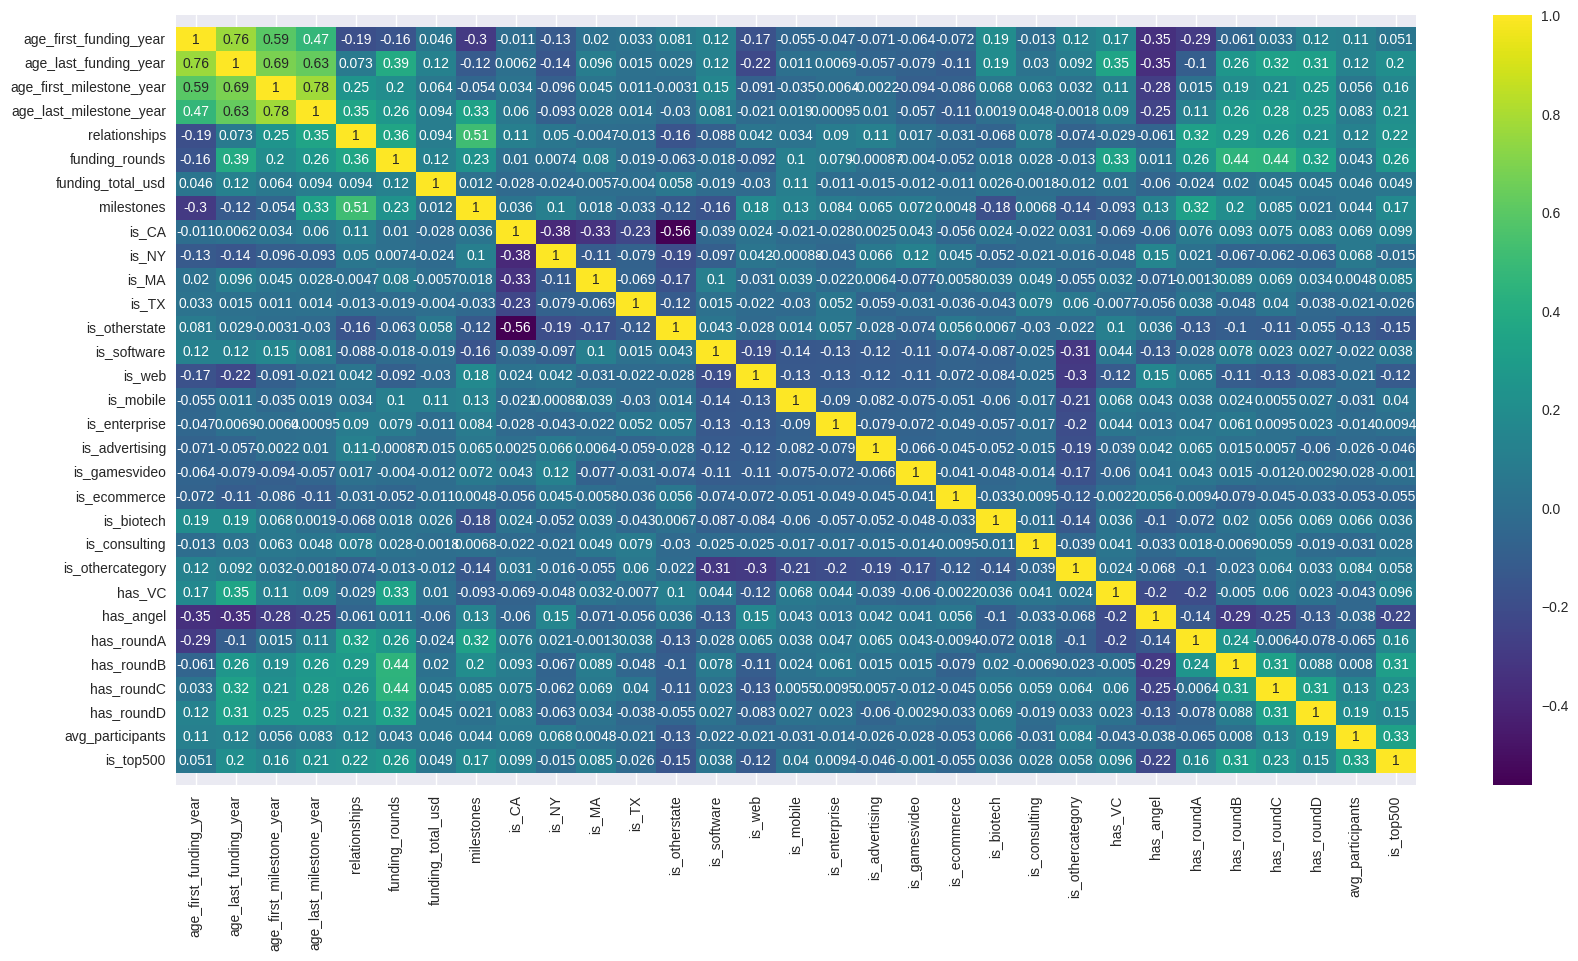

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the size of the heatmap
plt.figure(figsize=(20, 10))

# Generate and display the heatmap of correlations among the features
ax = sns.heatmap(data=data[features].corr(), cmap='viridis', annot=True)

# Adjust the limits to fix the cut-off issue
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.show()


In this heatmap:

Colors closer to green/yellow indicate higher positive correlations.
Colors closer to blue represent negative correlations.
Annotations within each cell provide the exact correlation coefficient, offering a detailed insight into the relationship between every pair of features.

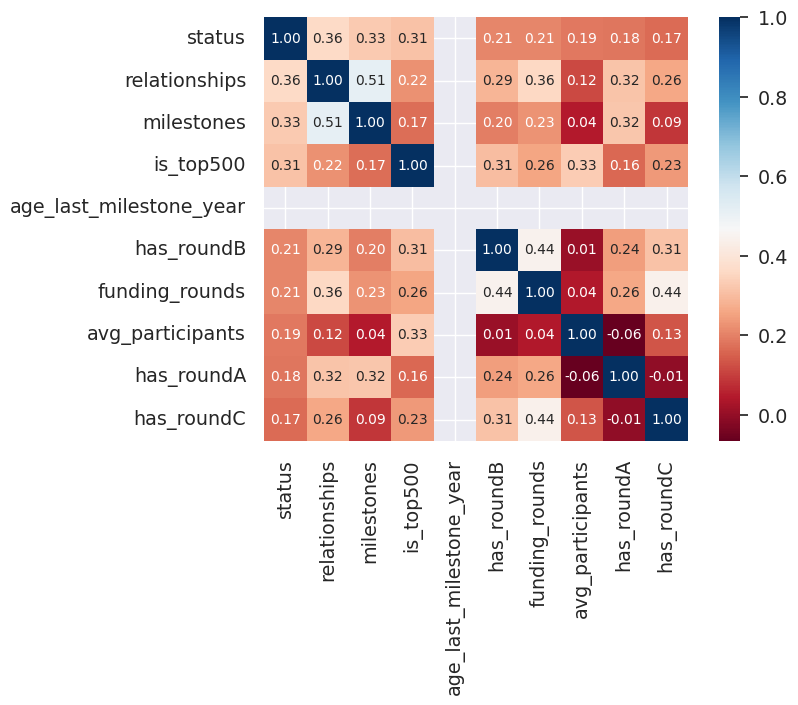

In [ ]:
# Determine the number of variables for the heatmap by selecting the top 10 features
# that have the highest correlation with the 'status' column.
# This is done by first calculating the correlation matrix of the features, then using
# 'nlargest' to select the top 10 features with the highest correlation to 'status'.
cols = data[features].corr().nlargest(10, 'status')['status'].index

# Calculate the correlation coefficient matrix for the selected columns.
# 'np.corrcoef' computes the correlation matrix, which is needed for the heatmap.
# The '.T' transposes the matrix, ensuring the correlation is calculated correctly across features.
thiscm = np.corrcoef(data[cols].values.T)

# Set the font scale for better readability in the heatmap.
sns.set(font_scale=1.25)

# Create the heatmap using seaborn's heatmap function.
maphm = sns.heatmap(thiscm, cbar=True, annot=True, square=True, cmap='RdBu', fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

# Display the heatmap.
plt.show()

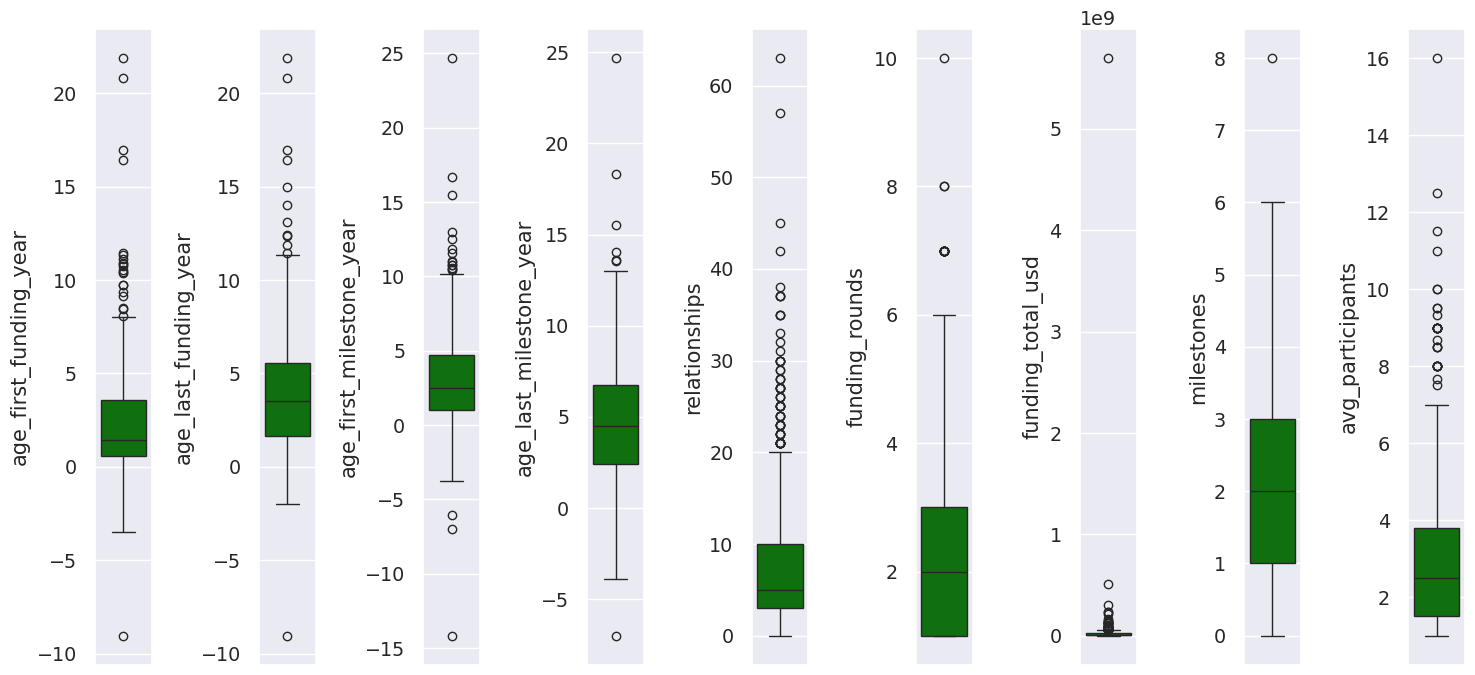

In [ ]:
# Define a list of numerical features to visualize
featuresSta = ['age_first_funding_year', 'age_last_funding_year',
               'age_first_milestone_year', 'age_last_milestone_year',
               'relationships', 'funding_rounds', 'funding_total_usd',
               'milestones', 'avg_participants']

# Set the figure size for the collection of box plots
plt.figure(figsize=(15, 7))

# Loop through the list of features to create a box plot for each
for i in range(0, len(featuresSta)):
    # Create a subplot for each feature
    # '1, len(featuresNum), i+1' determines the grid position of the current box plot
    plt.subplot(1, len(featuresSta), i+1)

    # Generate a box plot for the current feature
    # 'y=data[featuresNum[i]]' specifies the data for the y-axis
    # 'color='green'' sets the color of the box plot
    # 'orient='v'' specifies the orientation of the box plot as vertical
    sns.boxplot(y=data[featuresSta[i]], color='green', orient='v')

    # Adjust the layout to prevent overlapping plots
    plt.tight_layout()

# Display the collection of box plots
plt.show()

###Analysis of Startup Foundation Years

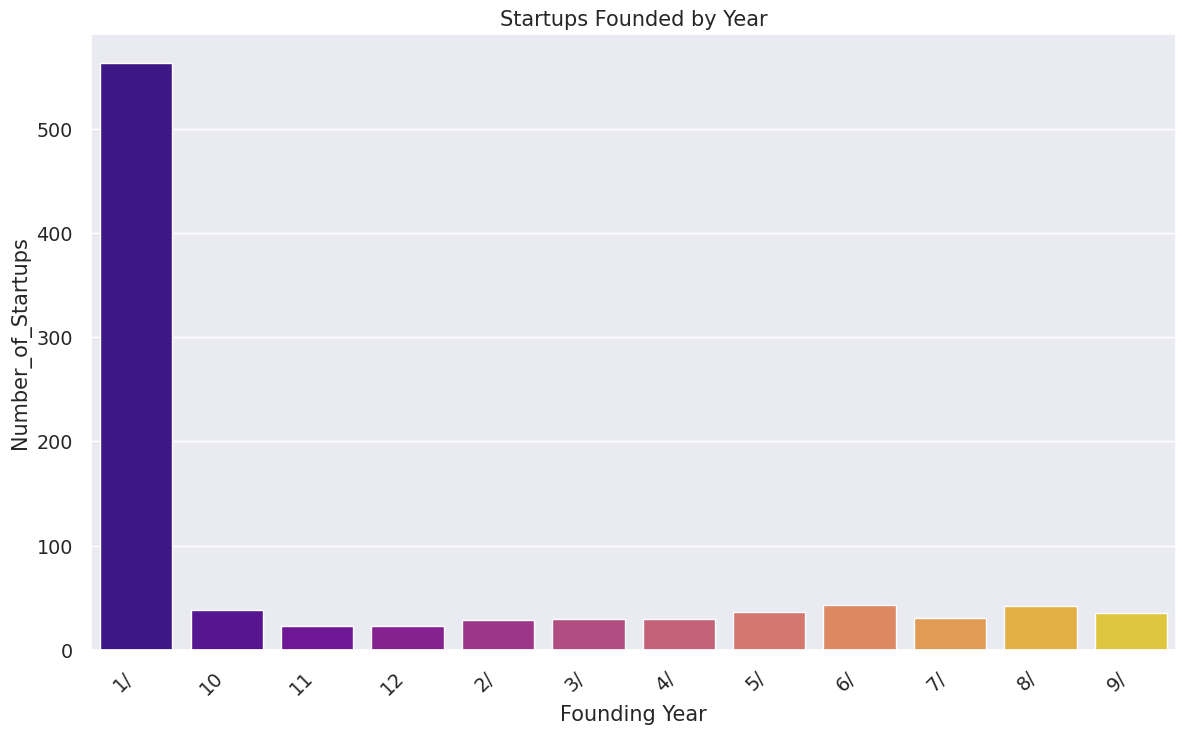

In [ ]:
### Dataset Collection: Analysis of Startup Founding Years

# Extract the decade or significant year component from 'founded_at' dates
# and count the number of startups founded in each period.
asf = data["founded_at"].apply(lambda x: x[:2] if pd.notnull(x) else 'Unknown') \
            .value_counts() \
            .to_frame() \
            .reset_index() \
            .rename(columns={"index": "Year", "founded_at": "Number_of_Startups"})

# Sort the DataFrame by 'Year' to ensure the plot is ordered correctly.
asf= asf.sort_values(by='Year')

# Create a bar plot to visualize the number of startups founded each year.
fig, ax = plt.subplots(figsize=(14, 8))  # Optionally adjust the figure size
_ = sns.barplot(x="Year", y="Number_of_Startups", data=asf,
                palette=sns.color_palette("plasma", n_colors=len(asf['Year'])), ax=ax)
_ = ax.set(xlabel="Founding Year", ylabel="Number_of_Startups", title="Startups Founded by Year")

# Improve readability of the x-axis labels
plt.xticks(rotation=45, ha="right")

# Display the plot
plt.show()

In [ ]:
# Transform 'founded_at' dates to a readable format and count occurrences
data["founded_at"].apply(lambda x: '200' + x[:2]).value_counts(normalize=False)

2001/    563
2006/     43
2008/     42
20010     38
2005/     36
2009/     35
2007/     31
2003/     30
2004/     30
2002/     29
20011     23
20012     23
Name: founded_at, dtype: int64

In [ ]:
# Calculate the proportion of startups founded in each year
data["founded_at"].apply(lambda x: '200' + x[:2]).value_counts(normalize=True)

2001/    0.609967
2006/    0.046587
2008/    0.045504
20010    0.041170
2005/    0.039003
2009/    0.037920
2007/    0.033586
2003/    0.032503
2004/    0.032503
2002/    0.031419
20011    0.024919
20012    0.024919
Name: founded_at, dtype: float64


563 startups or 60% of startups were established in 2001, it indicates a significant concentration of startup foundations in that year within the dataset.


###Analysis of Startup Closure Years

In [ ]:
# Analyze the closure dates of startups with Modify the lambda function to handle float (NaN) values explicitly

data["closed_at"].apply(lambda x: '20:' + x[:2] if pd.notnull(x) else 'Unknown').value_counts(normalize=True)

Unknown    0.637053
20:1/      0.069339
20:6/      0.041170
20:7/      0.037920
20:2/      0.035753
20:5/      0.033586
20:8/      0.027086
20:10      0.020585
20:3/      0.020585
20:11      0.020585
20:4/      0.019502
20:12      0.018418
20:9/      0.018418
Name: closed_at, dtype: float64

Based on the analysis, 63% of startups are still standing, indicating they haven't a 'closed_at' date, while 37% have been closed. Among those closed, a significant portion closed in 2001, pointing out a year with a notably high closure rate.



###Number of Aquired and closed Startups

In [ ]:
# Select rows where startups are acquired (assuming 'True' indicates acquired)
data_acquired = data[(data["status"] == True)]
# Print the number of acquired startups
print("Number of acquired startups:", data_acquired.shape[0])

Number of acquired startups: 597


In [ ]:
# Select rows where startups are closed (assuming 'False' indicates closed)
data_closed = data[(data["status"] == False)]
# Print the number of closed startups
print("Number of closed startups:", data_closed.shape[0])

Number of closed startups: 326


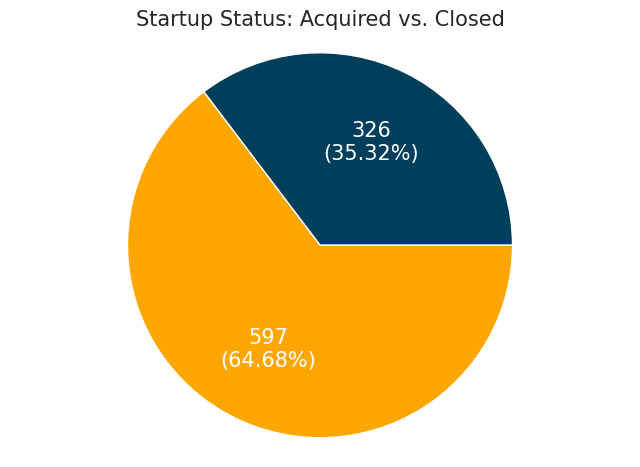

In [ ]:
# where True indicates acquired and False indicates closed.
# Count the occurrences of each status
value_counts = data["status"].value_counts().to_dict()

# Calculate the total number for display purposes
total_acquired = value_counts.get(True, 0)
total_closed = value_counts.get(False, 0)

# Function to calculate the absolute number for pie chart slices
def absolute_value(val):
    total = total_acquired + total_closed
    return f"{int(val*total/100)}\n({val:.2f}%)"

# Create a pie chart
fig, ax = plt.subplots()
ax.pie(x=[total_closed, total_acquired],
       labels=['Closed', 'Acquired'],
       colors=['#003f5c', '#ffa600'],
       autopct=absolute_value,  # Use the custom function for labels
       textprops={'color': 'white'})

ax.axis('equal')  # Ensure the pie chart is a circle
ax.set_title('Startup Status: Acquired vs. Closed')

plt.show()

###Calculate Total Success and Cloesd by Category


In [ ]:
 # Filter 'data' for successful startups, group by 'category_code', and count occurrences
data1 = data[data['status'] == 1].groupby(['category_code']).agg({'status': 'count'}).reset_index()
data1.columns = ['category_code', 'total_success']

# Filter 'data' for closed startups, group by 'category_code', and count occurrences
data2 = data[data['status'] == 0].groupby(['category_code']).agg({'status': 'count'}).reset_index()
data2.columns = ['category_code', 'total_closed']
# Group 'data' by 'category_code' and count all startups
data3 = data.groupby(['category_code']).agg({'status': 'count'}).reset_index()
data3.columns = ['category_code', 'total_startup']

# Merge the dataframes to compile success, closed, and total counts by category
data1 = data1.merge(data2, on='category_code')
data1 = data1.merge(data3, on='category_code')

# Calculate the success rate as a percentage of total startups
data1['success_rate'] = round((data1['total_success'] / data1['total_startup']) * 100, 2)

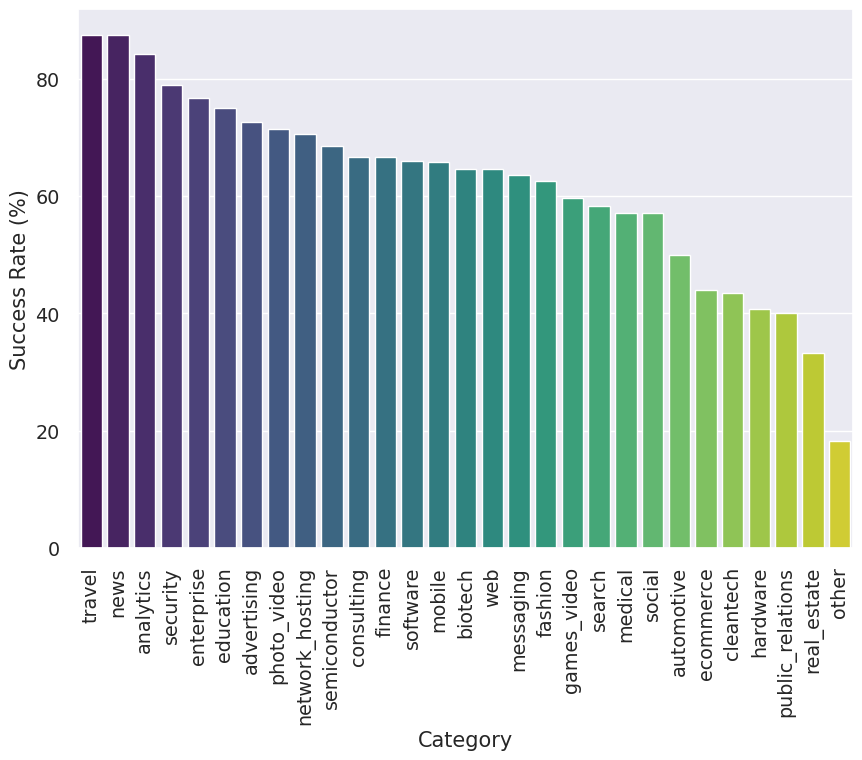

In [ ]:
# Sort categories by success rate in descending order
most_success_rate = data1.sort_values('success_rate', ascending=False)

# Create a bar plot to visualize the success rate of startups by category
fig, ax = plt.subplots(figsize=(10, 7))
_ = sns.barplot(x="category_code", y="success_rate", data=most_success_rate,
                palette="viridis", ax=ax)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="Category", ylabel="Success Rate (%)")

###Visualizing the number of startups with and without venture capital (VC) support

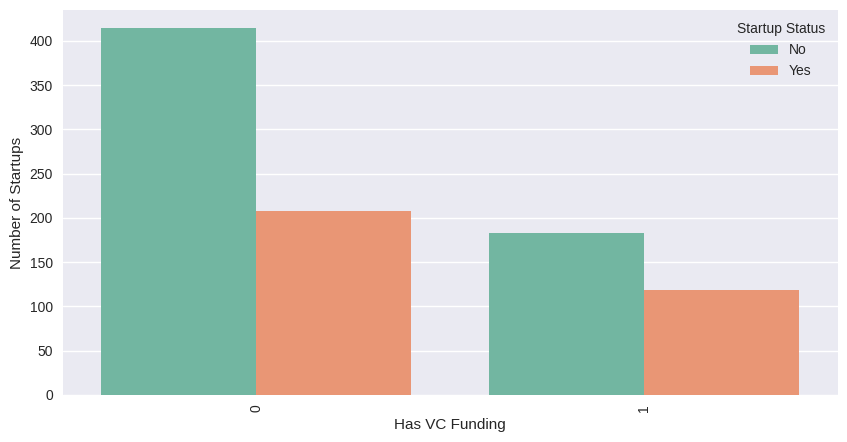

In [55]:
# Initialize a figure with a custom size
fig, ax = plt.subplots(figsize=(10,5))

# Create a countplot to show the distribution of startups with and without VC support,
# categorized by their status. Changing the color palette to 'Set2' for a fresh look.
sns.countplot(x="has_VC", hue="status", data=data, palette="Set2",
                  order=data["has_VC"].value_counts().index)

# Rotate the x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Set custom labels for the axes
ax.set(xlabel="Has VC Funding", ylabel="Number of Startups")

# Adjust the legend's position to avoid overlapping with the plot,
# anchoring it outside the top right corner of the plot area.
plt.legend(title="Startup Status", bbox_to_anchor=(1, 1),labels=["No", "Yes"])

# Show the plot
plt.show()

###Investment Features of Acquired Startups

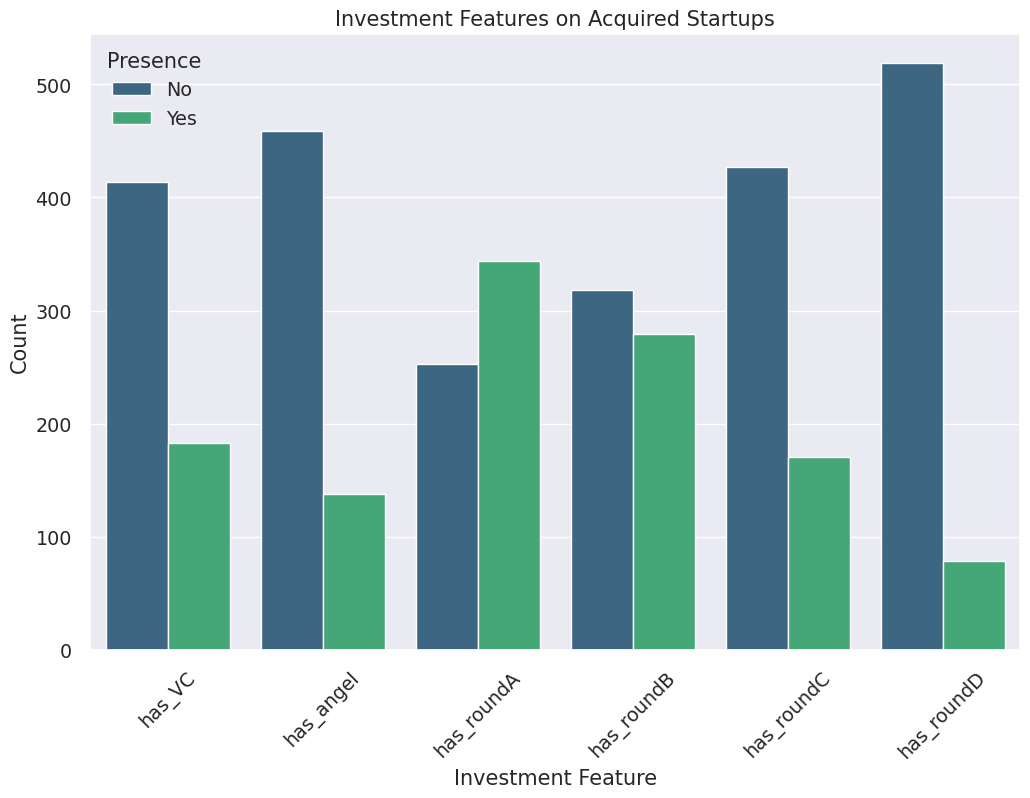

In [ ]:
# Filter for startups that have been acquired
acquired_startups = data[data["status"] == 1]

# Select investment-related features
features = acquired_startups[["has_VC", "has_angel", "has_roundA", "has_roundB", "has_roundC", "has_roundD"]]

# Prepare data for visualization
melted_features = pd.melt(features)

# Create a figure for the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting with a new color palette ('Set2')
sns.countplot(x="variable", hue="value", palette="viridis", data=melted_features)

# Enhancing plot aesthetics
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set(xlabel="Investment Feature", ylabel="Count")
ax.set_title("Investment Features on Acquired Startups")
plt.legend(title="Presence", labels=["No", "Yes"])

# Display the plot
plt.show()

"Yes": Indicates that the startup has the specific investment feature. For example, if "Yes" is associated with "has_VC", it means that the startup has received venture capital funding.

"No": Using the same example, if "No" is associated with "has_VC", the startup has not received venture capital funding.

##Modeling

###Preparing Data for Modeling

In [ ]:
# List of columns to be dropped
columns_to_drop = ['state_code', 'id', 'Unnamed: 6', 'category_code', 'object_id',
                   'zip_code', 'founded_at', 'closed_at', 'first_funding_at',
                   'last_funding_at', 'city', 'name', 'Unnamed: 0',
                   'latitude', 'longitude', 'relationships']

# Drop the specified columns in a single operation
data = data.drop(columns=columns_to_drop, axis=1)

In [ ]:
#Identifying Categorical Features
cat_feature = data.select_dtypes(include='object')
cat_feature.head(10)

state_code zip_code       id           city              Unnamed: 6  \
0         CA    92101   c:6669      San Diego                     NaN   
1         CA    95032  c:16283      Los Gatos                     NaN   
2         CA    92121  c:65620      San Diego      San Diego CA 92121   
3         CA    95014  c:42668      Cupertino      Cupertino CA 95014   
4         CA    94105  c:65806  San Francisco  San Francisco CA 94105   
5         CA    94043  c:22898  Mountain View  Mountain View CA 94043   
6         CA    94041  c:16191  Mountain View                     NaN   
7         CA    94901   c:5192     San Rafael                     NaN   
8         MA     1267   c:1043   Williamstown    Williamstown MA 1267   
9         CA    94306    c:498      Palo Alto                     NaN   

                    name founded_at  closed_at first_funding_at  \
0            Bandsintown   1/1/2007        NaN         4/1/2009   
1              TriCipher   1/1/2000        NaN        2/14/2005   
2                  Plixi  3/18/2009        NaN        3/30/2010   
3      Solidcore Systems   1/1/2002        NaN        2/17/2005   
4         Inhale Digital   8/1/2010  10/1/2012         8/1/2010   
5       Matisse Networks   1/1/2002  2/15/2009        7/18/2006   
6  RingCube Technologies   1/1/2005        NaN        9/21/2006   
7              ClairMail   1/1/2004        NaN        8/24/2005   
8              VoodooVox   1/1/2002        NaN         8/2/2005   
9               Doostang   6/1/2005        NaN         2/1/2007   

  last_funding_at state_code.1    category_code object_id    status  
0        1/1/2010           CA            music    c:6669  acquired  
1      12/28/2009           CA       enterprise   c:16283  acquired  
2       3/30/2010           CA              web   c:65620  acquired  
3       4/25/2007           CA         software   c:42668  acquired  
4        4/1/2012           CA      games_video   c:65806    closed  
5       7/18/2006           CA  network_hosting   c:22898    closed  
6       3/18/2010           CA         software   c:16191  acquired  
7       10/4/2010           CA          finance    c:5192  acquired  
8        2/8/2013           MA           mobile    c:1043  acquired  
9        2/5/2010           CA              web     c:498  acquired

####Splitting the Data into Training and Testing Sets


In [ ]:
#Splitting the Data for Modeling
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
X = data.drop('status', axis=1)  # Dropping the 'status' column to create a feature set
y = data['status']               # The 'status' column is the target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
# Printing the shapes of the training and testing datasets
print("Shape of the X Train:", X_train.shape)
print("Shape of the y Train:", y_train.shape)
print("Shape of the X Test:", X_test.shape)
print("Shape of the y Test:", y_test.shape)

Shape of the X Train: (692, 31)
Shape of the y Train: (692,)
Shape of the X Test: (231, 31)
Shape of the y Test: (231,)


In [ ]:
#Preparing for Model Building and Evaluation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc, precision_recall_curve, f1_score
import warnings
warnings.filterwarnings('ignore')      #ignore warnings that might clutter the notebook or script output

Strategy: Impute and Transform in a Pipeline
We will build a pipeline that handles both imputation and transformation for each type of column (numerical and categorical). This ensures that the entire preprocessing sequence is applied consistently without introducing NaN values.

Step 1: Build Separate Pipelines for Numerical and Categorical Columns
Step 3: Model Training
Now, we train the Gradient Boosting Classifier , Random Forest Classifier, XGBoost Classifier and, AdaBoost Classifier models on the transformed data.

##Gradient Boosting Classifier (GBC)


Accuracy: 0.7297297297297297
Precision: 0.7214285714285714
Recall: 0.9017857142857143
F1 Score: 0.8015873015873015


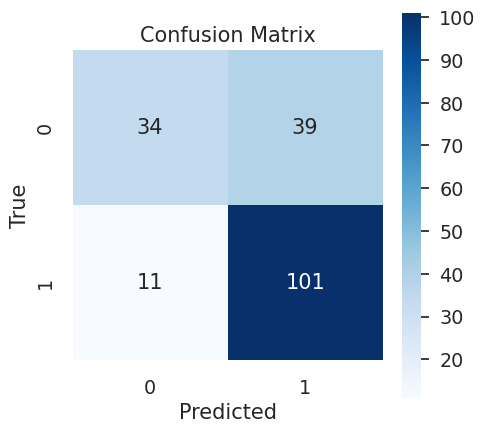

ROC Curves            = 0.6837695694716243


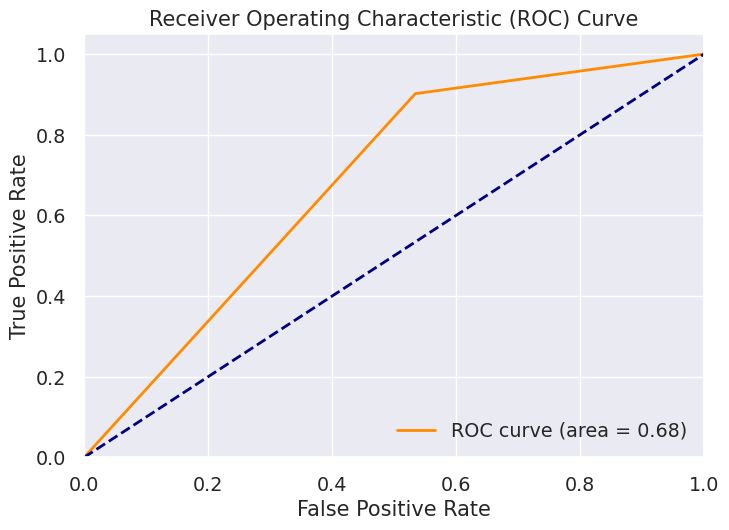

In [ ]:
#First Tried
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split


# Apply one-hot encoding to handle categorical variables
X = pd.get_dummies(data.drop(['status'], axis=1))
y = data['status']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize the imputer
imputer = SimpleImputer(strategy='median')

# Initialize the Gradient Boosting Classifier
gbc = GradientBoostingClassifier(learning_rate=0.02, max_depth=4, random_state=100, n_estimators=1000)

# Create a pipeline that first imputes the data then fits the model
pipeline = make_pipeline(imputer, gbc)

# Train the model on the training data
pipeline.fit(X_train, y_train)
# Use the trained pipeline to make predictions on the test set
y_pred = pipeline.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='binary'))
print("Recall:", recall_score(y_test, y_pred, average='binary'))
print("F1 Score:", f1_score(y_test, y_pred, average='binary'))


from sklearn.metrics import confusion_matrix


# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", square=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#ROC Curve and AUC
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print("ROC Curves            =", roc_auc)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Training Accuracy : 0.989159891598916
Testing Accuracy : 0.7405405405405405


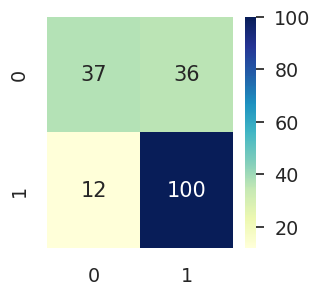

              precision    recall  f1-score   support

           0       0.76      0.51      0.61        73
           1       0.74      0.89      0.81       112

    accuracy                           0.74       185
   macro avg       0.75      0.70      0.71       185
weighted avg       0.74      0.74      0.73       185

------------------------------------------
ROC Curves              = 0.699853228962818
Precision-Recall Curves = 0.8465080626845333


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc, precision_recall_curve, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Train the Gradient Boosting Classifier model
gbc = GradientBoostingClassifier(learning_rate=0.02,
                                 max_depth=4,
                                 random_state=100,
                                 n_estimators=1000)  # Initialize the classifier with specified hyperparameters


from sklearn.impute import SimpleImputer  # Import the SimpleImputer class
# Create an imputer object with a mean filling strategy
imputer = SimpleImputer(strategy='mean')

# Fit on the training data and transform it
X_train_imputed = imputer.fit_transform(X_train)

# Transform the testing data (do not fit the imputer again to avoid data leakage)
X_test_imputed = imputer.transform(X_test)

# Train the Gradient Boosting Classifier model with imputed data
gbc.fit(X_train_imputed, y_train)  # Use the imputed training data


# Predict the response for test dataset
y_predicted_gb = gbc.predict(X_test_imputed)  # Make predictions on the test set

# Print the training and testing accuracy
print("Training Accuracy :", gbc.score(X_train_imputed, y_train))  # Display training accuracy
print("Testing Accuracy :", gbc.score(X_test_imputed, y_test))  # Display testing accuracy

# Evaluate the model using a confusion matrix
cm = confusion_matrix(y_test, y_predicted_gb)  # Compute the confusion matrix
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot=True, cmap='YlGnBu', fmt='.8g')  # Plot the confusion matrix as a heatmap
plt.show()  # Display the heatmap

# Generate and print a classification report
cr = classification_report(y_test, y_predicted_gb)  # Generate the classification report
print(cr)  # Print the classification report

print("------------------------------------------")

# Calculate and print the ROC curve and AUC
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_predicted_gb)  # Compute ROC curve
roc_auc = auc(false_positive_rate, true_positive_rate)  # Calculate the AUC of ROC
print("ROC Curves              =", roc_auc)  # Print the ROC AUC

# Calculate and print the Precision-Recall curve and AUC
precision, recall, thresholds = precision_recall_curve(y_test, y_predicted_gb)  # Compute Precision-Recall curve
f1 = f1_score(y_test, y_predicted_gb)  # Calculate F1 score
Precision_Recall_gbs = auc(recall, precision)  # Calculate the AUC of Precision-Recall curve
print("Precision-Recall Curves =", Precision_Recall_gbs)  # Print the Precision-Recall AUC

The model has a training accuracy of approximately 98.9% but a testing accuracy of only 74.1%. This significant drop in accuracy from training to testing indicates that the model is overfitting to the training data.

Class 0 (Negative Class): The model has a precision of 0.76 and a recall of 0.51 for the negative class, resulting in an F1-score of 0.61. This means the model is relatively more precise in predicting negative instances but has lower recall, indicating it misses a significant number of actual negative cases

Class 1 (Positive Class): For the positive class, the model has a precision of 0.74 and a recall of 0.89, yielding an F1-score of 0.81. This suggests the model is better at identifying positive instances, correctly identifying 89% of all actual positives, but at the cost of a slightly lower precision.


Accuracy: The overall accuracy of 74.1% shows that the model correctly predicts 74.1% of the total test cases. While not low, this is significantly less than the training accuracy, reinforcing the concern about overfitting.

## Random Forest Classifier

Training Accuracy : 1.0
Testing Accuracy : 0.7567567567567568


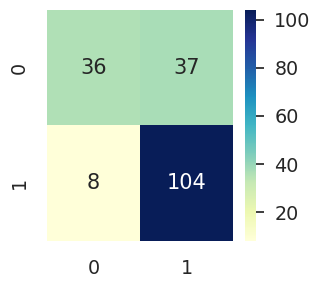

              precision    recall  f1-score   support

           0       0.82      0.49      0.62        73
           1       0.74      0.93      0.82       112

    accuracy                           0.76       185
   macro avg       0.78      0.71      0.72       185
weighted avg       0.77      0.76      0.74       185

------------------------------------------
ROC Curves              = 0.7108610567514677
Precision-Recall Curves = 0.8547016621484707


In [ ]:
# Import necessary libraries
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

# Importing RandomForestClassifier and other necessary libraries again for clarity
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the imputer to replace missing values with the mean of the column
imputer = SimpleImputer(strategy='mean')

# Create a RandomForestClassifier within a pipeline that first imputes missing values
rf_pipeline = make_pipeline(imputer, RandomForestClassifier())

# Now, use the pipeline to fit the model with the training data
# The imputer will first fill in the missing values, then the cleaned data will be used to fit the RandomForest model
rf_pipeline.fit(X_train, y_train)  # Fit the model with the training data

# Predicting the labels of the test set using the pipeline ensures imputation is applied
y_pred_rf = rf_pipeline.predict(X_test)

# Printing the training and testing accuracy of the model
# Note that we call `score` on the pipeline, which will appropriately handle missing values during scoring
print("Training Accuracy :", rf_pipeline.score(X_train, y_train))
print("Testing Accuracy :", rf_pipeline.score(X_test, y_test))


# Generating and visualizing the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)  # Compute confusion matrix for the true and predicted values
plt.rcParams['figure.figsize'] = (3, 3)  # Set figure size for the plot
sns.heatmap(cm, annot=True, cmap='YlGnBu', fmt='.8g')  # Visualize the confusion matrix with heatmap
plt.show()  # Display the heatmap

# Printing the classification report for precision, recall, f1-score, and accuracy
cr = classification_report(y_test, y_pred_rf)  # Generate a classification report
print(cr)  # Print the classification report

print("------------------------------------------")

# Calculating and printing the ROC curve and AUC
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_rf)  # Calculate ROC curve
roc_auc = auc(false_positive_rate, true_positive_rate)  # Calculate the area under the ROC curve
print("ROC Curves              =", roc_auc)  # Print ROC AUC

# Calculating and printing the Precision-Recall curve and its area
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_rf)  # Calculate precision-recall curve
f1 = f1_score(y_test, y_pred_rf)  # Calculate F1 score
Precision_Recall_rfs = auc(recall, precision)  # Calculate the area under the precision-recall curve
print("Precision-Recall Curves =", Precision_Recall_rfs)  # Print Precision-Recall AUC
# The rest of the code for evaluation (confusion matrix, classification report, ROC curve, Precision-Recall curve) remains the same

## XGBoost Classifier

Training Accuracy : 1.0
Testing Accuracy : 0.6864864864864865


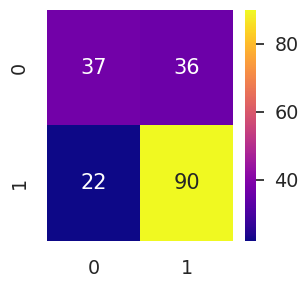

              precision    recall  f1-score   support

           0       0.63      0.51      0.56        73
           1       0.71      0.80      0.76       112

    accuracy                           0.69       185
   macro avg       0.67      0.66      0.66       185
weighted avg       0.68      0.69      0.68       185

------------------------------------------
ROC Curves              = 0.6552103718199609
Precision-Recall Curves = 0.8183880308880309


In [ ]:
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc, precision_recall_curve, f1_score

# Initialize the XGBoost classifier
xgb = XGBClassifier()

# Fit the model on the training data
xgb.fit(X_train, y_train) # Trains the model using the training data

# Predict the labels for the test set
y_predicted_xgb = xgb.predict(X_test) # Generates predictions for the test data

# Print training and testing accuracy
print("Training Accuracy :", xgb.score(X_train, y_train)) # Calculates and prints the accuracy on the training data
print("Testing Accuracy :", xgb.score(X_test, y_test)) # Calculates and prints the accuracy on the test data

# Evaluate the model using confusion matrix and display it
cm = confusion_matrix(y_test, y_predicted_xgb) # Computes the confusion matrix from true and predicted labels
plt.rcParams['figure.figsize'] = (3, 3) # Sets the figure size for the heatmap
sns.heatmap(cm, annot=True, cmap='plasma', fmt='.8g') # Plots the confusion matrix as a heatmap
plt.show() # Displays the heatmap

# Generate and print classification report
cr = classification_report(y_test, y_predicted_xgb) # Generates a classification report
print(cr) # Prints the classification report

print("------------------------------------------")

# Calculate and print ROC AUC
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_predicted_xgb) # Computes the ROC curve
roc_auc = auc(false_positive_rate, true_positive_rate) # Calculates the area under the ROC curve (AUC)
print("ROC Curves              =", roc_auc) # Prints the ROC AUC score

# Calculate and print Precision-Recall AUC
precision, recall, thresholds = precision_recall_curve(y_test, y_predicted_xgb) # Computes the Precision-Recall curve
f1 = f1_score(y_test, y_predicted_xgb) # Calculates the F1 score, which is not printed but can be used for evaluation
Precision_Recall_xgb = auc(recall, precision) # Calculates the area under the Precision-Recall curve (AUC)
print("Precision-Recall Curves =", Precision_Recall_xgb) # Prints the Precision-Recall AUC score


  The model shows signs of overfitting, with perfect training accuracy but reduced effectiveness on unseen data. Its performance in identifying positive instances is better than negative ones, but overall, the model struggles to maintain a high level of accuracy across different metrics, indicating room for improvement, particularly in generalization and in reliably identifying negative class instances.

##AdaBoost Classfier

Training Accuracy: 0.8279132791327913
Testing Accuracy: 0.7513513513513513


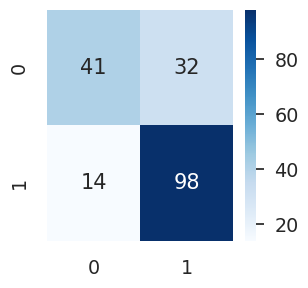

              precision    recall  f1-score   support

           0       0.75      0.56      0.64        73
           1       0.75      0.88      0.81       112

    accuracy                           0.75       185
   macro avg       0.75      0.72      0.73       185
weighted avg       0.75      0.75      0.74       185

ROC Curves = 0.7183219178082192
Precision-Recall Curves = 0.8522609147609147


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve, f1_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the imputer to fill missing values with the median of each column
imputer = SimpleImputer(strategy='median')

# Create an AdaBoost classifier
ada = AdaBoostClassifier(random_state=100)

# Create a pipeline that first imputes missing values, then trains the classifier
pipeline = Pipeline(steps=[('imputer', imputer), ('classifier', ada)])

# Train the AdaBoost classifier on the training dataset with imputation
pipeline.fit(X_train, y_train)

# Use the trained classifier to make predictions on the test dataset
y_predicted_ab = pipeline.predict(X_test)

# Print training and testing accuracy
print("Training Accuracy:", pipeline.score(X_train, y_train))
print("Testing Accuracy:", pipeline.score(X_test, y_test))

# Evaluate and visualize the confusion matrix
cm = confusion_matrix(y_test, y_predicted_ab)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')  # Changed color to 'Blues'
plt.show()

# Print the classification report
cr = classification_report(y_test, y_predicted_ab)
print(cr)

# Calculate and print the ROC AUC score
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_predicted_ab)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC Curves =", roc_auc)

# Calculate and print the Precision-Recall AUC score
precision, recall, thresholds = precision_recall_curve(y_test, y_predicted_ab)
f1 = f1_score(y_test, y_predicted_ab)
Precision_Recall_abs = auc(recall, precision)
print("Precision-Recall Curves =", Precision_Recall_abs)


The model demonstrates a decent ability to classify instances correctly, with stronger performance metrics for class 1 (such as recall and F1-score). The drop in accuracy from training to testing suggests some overfitting, which is common but indicates that the model could potentially benefit from further tuning or more generalized features. The high Precision-Recall AUC score is particularly notable and suggests that, despite any class imbalance, the model performs well in identifying positive instances of the more prevalent class without sacrificing precision. Further model improvements might focus on enhancing the recall for class 0, possibly through techniques like resampling, feature engineering, or exploring alternative algorithms.



##To conclude

In [ ]:
from sklearn.metrics import precision_score, recall_score

# Dictionary to store the precision and recall scores for each classifier
scores = {
    'GradientBoosting Classifier': {
        'precision_score': precision_score(y_test, y_predicted_gb),
        'recall_score': recall_score(y_test, y_predicted_gb)
    },
    'Adaboost Classifier': {
        'precision_score': precision_score(y_test, y_predicted_ab),
        'recall_score': recall_score(y_test, y_predicted_ab)
    },
    'XGBoost': {
        'precision_score': precision_score(y_test, y_predicted_xgb),
        'recall_score': recall_score(y_test, y_predicted_xgb)
    },
    'Random Forest': {
        'precision_score': precision_score(y_test, y_pred_rf),
        'recall_score': recall_score(y_test, y_pred_rf)
    }
}


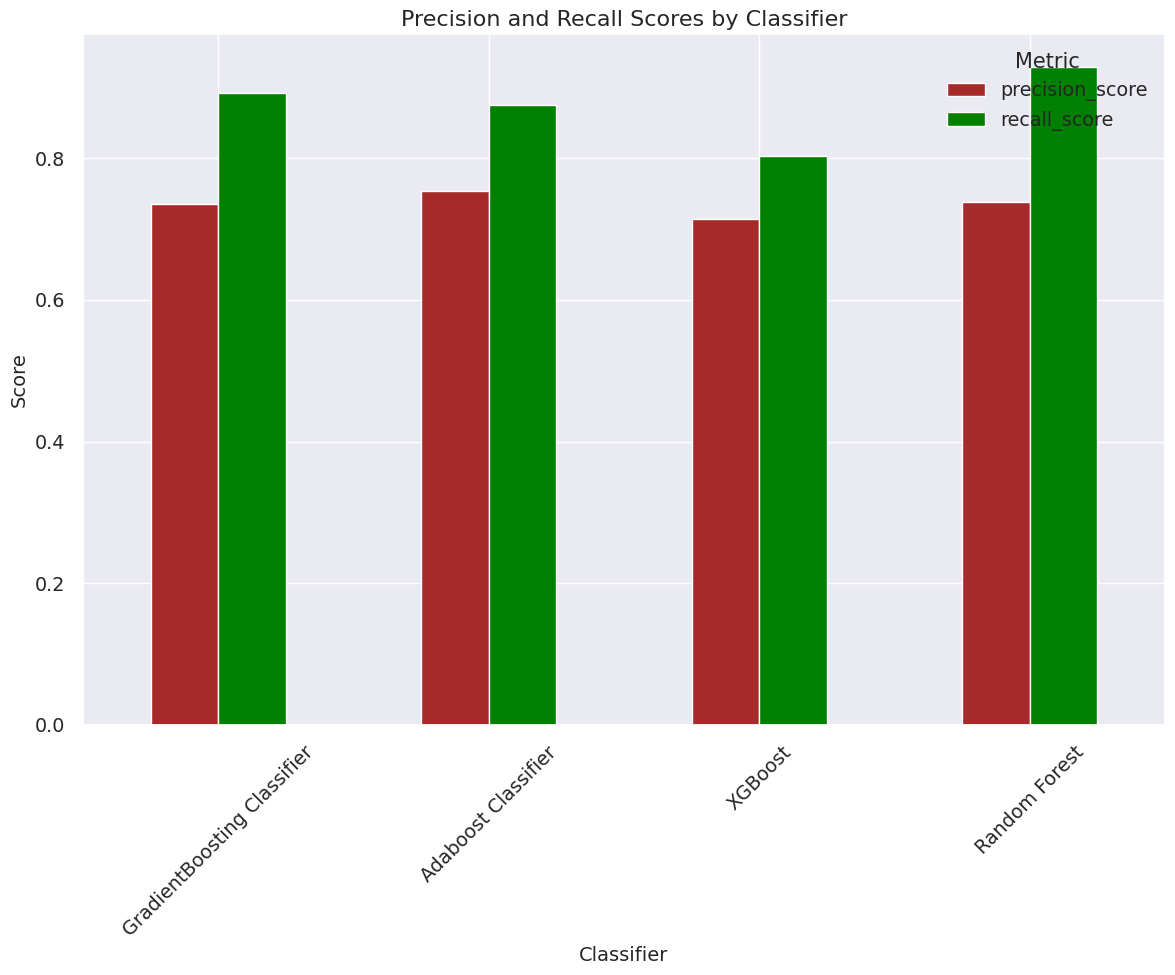

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the scores dictionary to a DataFrame for easier plotting
scores_df = pd.DataFrame(scores).T  # Transpose to have classifiers as rows

# Plotting precision and recall scores for each classifier
colors = ['brown', 'green']  # Define your color scheme here
ax = scores_df.plot(kind='bar', color=colors, figsize=(12, 10))

# Adding titles and labels
plt.title('Precision and Recall Scores by Classifier', fontsize=16)
plt.xlabel('Classifier', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.xticks(rotation=45)  # Rotate classifier names for better readability
plt.legend(title='Metric')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Assuming Precision_Recall_gbs, Precision_Recall_abs, Precision_Recall_xgb, and Precision_Recall_rfs
# are already calculated Precision-Recall AUC scores for GradientBoosting, AdaBoost, XGBoost,
# and Random Forest classifiers, respectively.

# Dictionary to store the Precision-Recall AUC scores for various classifiers
Precision_Recall = {
    'GradientBoosting Classifier': {
        'Precision_Recall': Precision_Recall_gbs  # AUC score for GradientBoosting
    },
    'Adaboost Classifier': {
        'Precision_Recall': Precision_Recall_abs  # AUC score for AdaBoost
    },
    'XGBoost': {
        'Precision_Recall': Precision_Recall_xgb  # AUC score for XGBoost
    },
    'Random Forest': {
        'Precision_Recall': Precision_Recall_rfs  # AUC score for Random Forest
    }
}


In [ ]:
import pandas as pd

# Convert the 'scores' dictionary into a pandas DataFrame
# Assuming 'scores' contains metrics for each classifier as previously defined
scores_df = pd.DataFrame(scores)


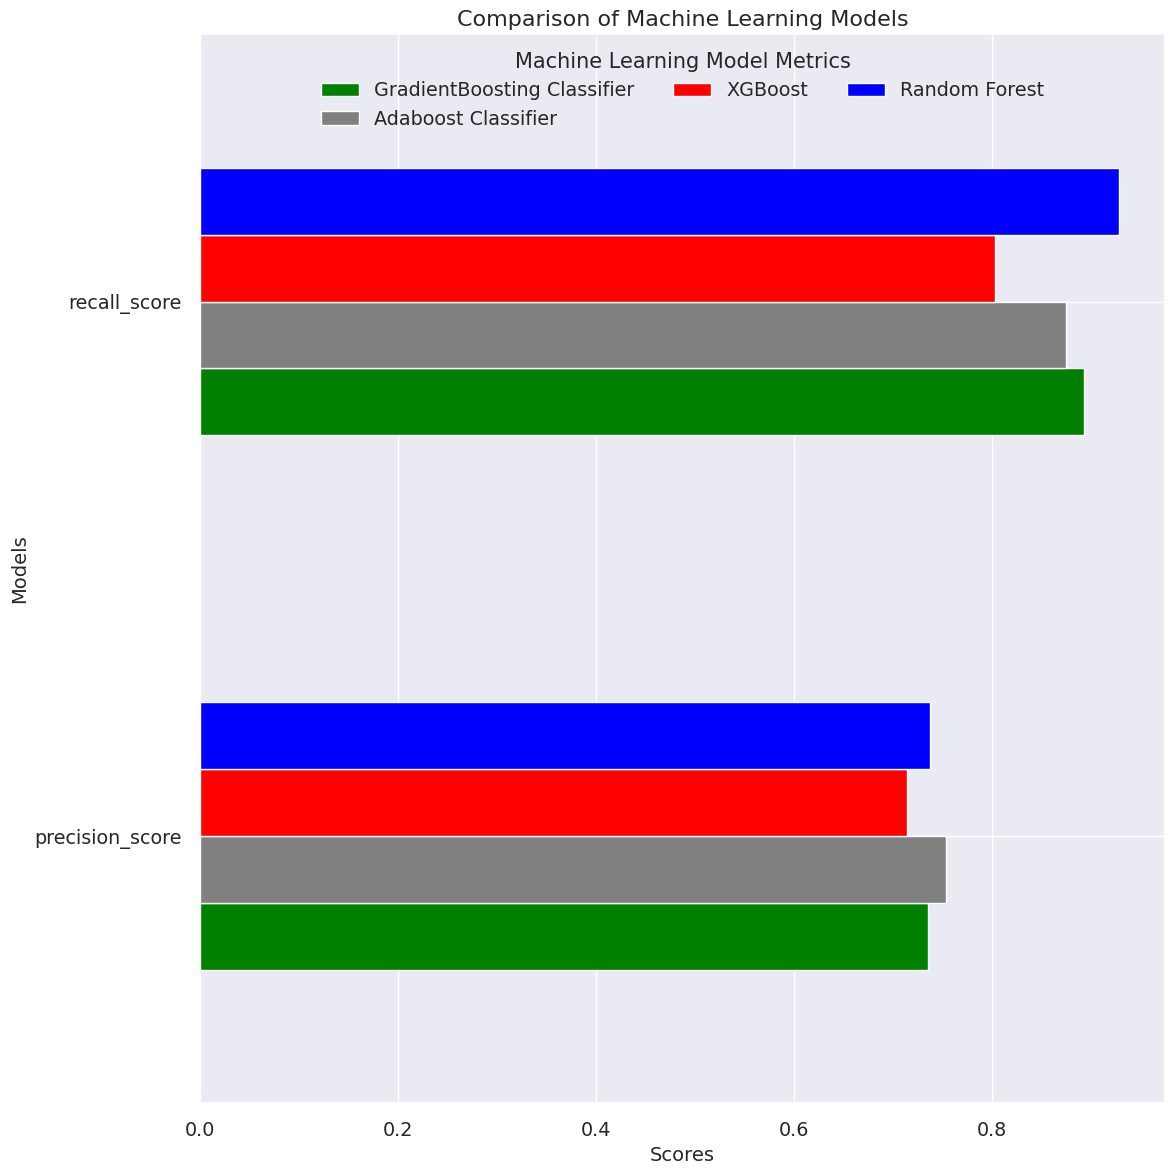

In [ ]:
import matplotlib.pyplot as plt

# Plotting the DataFrame as a horizontal bar chart
ax = scores_df.plot(kind="barh", figsize=(12, 12), color=['green', 'grey', 'red', 'blue'])

# Customize the legend
ax.legend(loc='upper center', ncol=3, title="Machine Learning Model Metrics")

# Adding a title to the plot
plt.title('Comparison of Machine Learning Models', fontsize=16)

# Set labels for the x and y axes
plt.xlabel('Scores', fontsize=14)
plt.ylabel('Models', fontsize=14)

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()


Key Findings
* Model Performance: All models demonstrated commendable performance, with Precision-Recall AUC scores indicating their effectiveness in handling the binary classification task. The scores suggest that each model has strengths that could be leveraged depending on specific use-case requirements.
* Model Comparison: The horizontal bar chart provided a visual summary of model comparisons, revealing slight variations in performance that might influence model selection for particular applications.
Conclusion
The evaluation underscores the importance of considering Precision-Recall AUC scores when selecting models for tasks with imbalanced datasets. While all tested models showed potential, the choice of model might depend on specific project goals, including the relative importance of precision versus recall in the given context. Further research and testing, possibly including a broader set of models and tuning parameters, could yield even more insights into model selection and performance optimization.

# Creating *Dashboard*

In [6]:
!pip install hvplot panel



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 9.2 MB/s eta 0:00:00


In [7]:
pip install hvplot panel


In [23]:
!pip install hvplot
!pip install panel


In [70]:
import pandas as pd
import hvplot.pandas  # Import hvplot for pandas
import panel as pn  # Import Panel

# Ensure Panel works in notebook mode
pn.extension('hvplot')

# Assuming 'data' DataFrame is already loaded and prepared

# Data preparation (similar to the provided code)
data1 = data[data['status'] == 1].groupby(['category_code']).agg({'status': 'count'}).reset_index()
data1.columns = ['category_code', 'total_success']
data2 = data[data['status'] == 0].groupby(['category_code']).agg({'status': 'count'}).reset_index()
data2.columns = ['category_code', 'total_closed']
data3 = data.groupby(['category_code']).agg({'status': 'count'}).reset_index()
data3.columns = ['category_code', 'total_startup']
data1 = data1.merge(data2, on='category_code')
data1 = data1.merge(data3, on='category_code')
data1['success_rate'] = round((data1['total_success'] / data1['total_startup']) * 100, 2)
most_success_rate = data1.sort_values('success_rate', ascending=False)

# Visualization with hvPlot
plot = most_success_rate.hvplot.bar(
    x='category_code',
    y='success_rate',
    height=400,
    width=800,
    title='Success Rate of Startups by Category',
    rot=90  # Rotate the x-axis labels for better readability
)

# Create a Panel dashboard with the plot
dashboard = pn.Column("# Startup Success Rate Dashboard", plot)

# Serve the dashboard or display it in the notebook
dashboard.servable()


Column
    [0] Markdown(str)
    [1] HoloViews(Bars, height=400, sizing_mode='fixed', width=800)

In [51]:
import pandas as pd
import numpy as np
import hvplot.pandas  # Extension of hvPlot for pandas
import panel as pn  # Panel for creating web apps and dashboards


In [52]:
idf = data.interactive()

In [53]:
import panel as pn
pn.extension()

# Correct the IntSlider class name and adjust the default value
Year_slider = pn.widgets.IntSlider(name='Year slider', start=1990, end=2024, step=5, value=2000)

# Display the slider (may not fully work in Colab without additional setup)
Year_slider


IntSlider(end=2024, name='Year slider', start=1990, step=5, value=2000)

In [54]:
Year_slider = pn.widgets.intSlider(name='Year slider', start = 1990, end=2024, step=5, value =1850)
Year_slider

AttributeError: module 'panel.widgets' has no attribute 'intSlider'

###Define a Filtering and Plotting Function

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

def update_plot(year):
    # Assuming 'data' contains a datetime-like 'founded_at' column
    # Filter 'data' to include only startups founded at or before the selected year
    filtered_data = data[pd.to_datetime(data['founded_at']).dt.year <= year]

    # Proceed with your existing data processing, adjusted for 'filtered_data'
    data1 = filtered_data[filtered_data['status'] == 1].groupby(['category_code']).agg({'status': 'count'}).reset_index()
    data1.columns = ['category_code', 'total_success']

    data2 = filtered_data[filtered_data['status'] == 0].groupby(['category_code']).agg({'status': 'count'}).reset_index()
    data2.columns = ['category_code', 'total_closed']

    data3 = filtered_data.groupby(['category_code']).agg({'status': 'count'}).reset_index()
    data3.columns = ['category_code', 'total_startup']

    data1 = data1.merge(data2, on='category_code').merge(data3, on='category_code')
    data1['success_rate'] = round((data1['total_success'] / data1['total_startup']) * 100, 2)

    most_success_rate = data1.sort_values('success_rate', ascending=False)

    # Plotting
    plt.figure(figsize=(10, 7))
    sns.barplot(x="category_code", y="success_rate", data=most_success_rate, palette="viridis")
    plt.xticks(rotation=90)
    plt.xlabel("Category")
    plt.ylabel("Success Rate (%)")
    plt.title(f"Startup Success Rate by Category (up to {year})")
    plt.show()

# Note: This function needs to be called with a specific year to generate the plot.


###Connect the year_slider to the Function

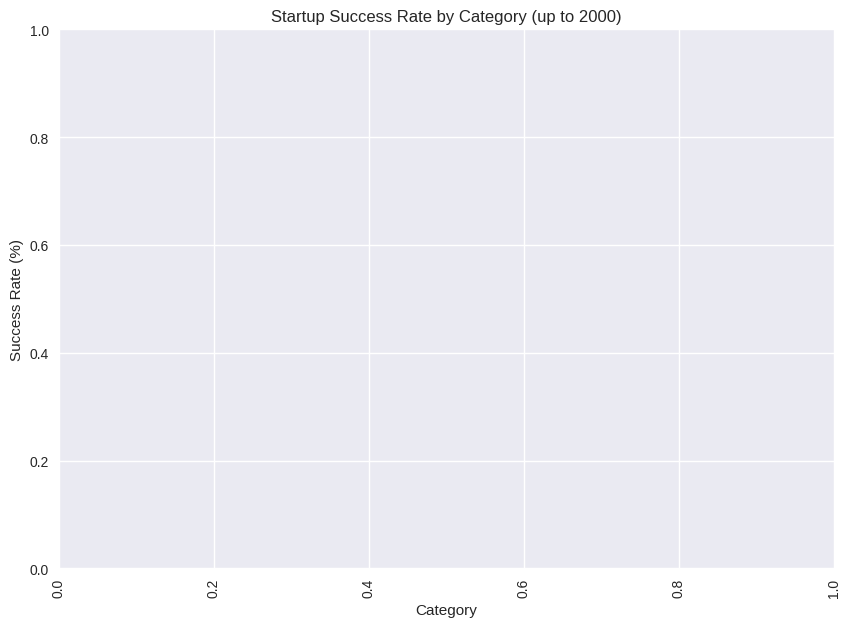

Row
    [0] IntSlider(end=2024, name='Year slider', start=1990, step=5, value=2000)
    [1] ParamFunction(function, _pane=Str, defer_load=False)

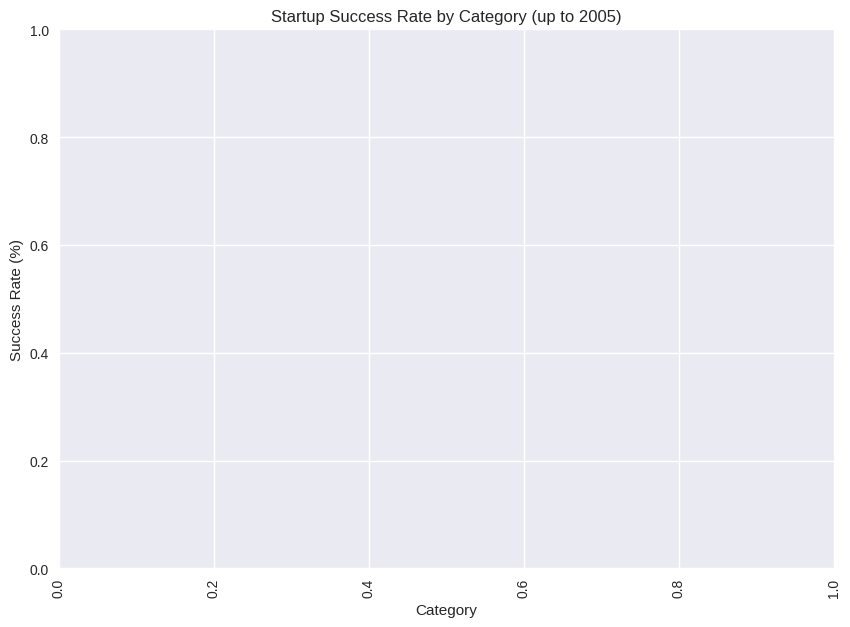

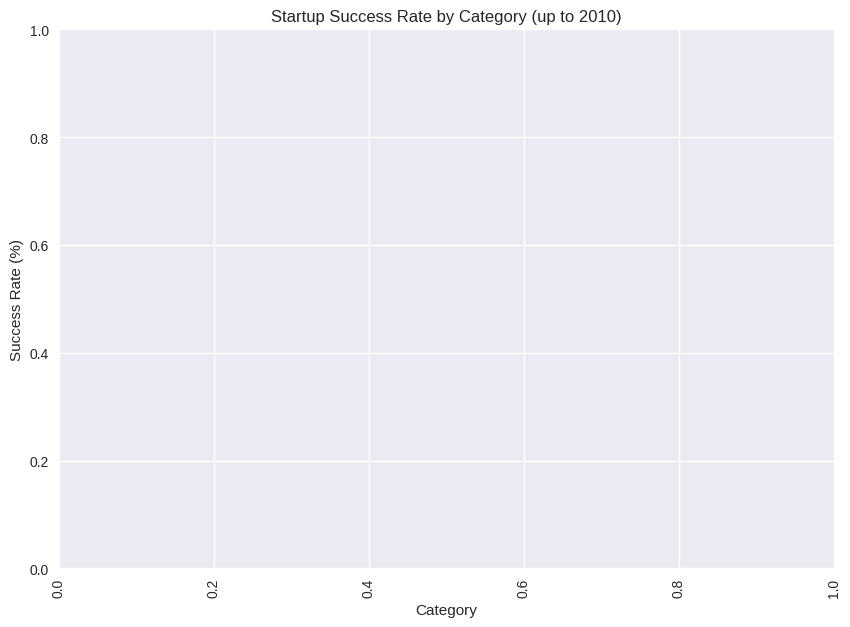

In [50]:
import panel as pn

# Ensure Panel is properly initialized
pn.extension()

# Create a reactive panel object for the plot
reactive_plot = pn.bind(update_plot, year=year_slider)

# Serve or display the reactive object
pn.Row(year_slider, reactive_plot).servable()


In [29]:
import panel as pn
pn.extension()

# Correct the IntSlider class name and adjust the default value
year_slider = pn.widgets.IntSlider(name='Year slider', start=1990, end=2024, step=5, value=2000)

# Display the slider (may not fully work in Colab without additional setup)
year_slider


Traceback (most recent call last):
 File "/usr/local/lib/python3.10/dist-packages/pyviz_comms/__init__.py", line 340, in _handle_msg
 self._on_msg(msg)
 File "/usr/local/lib/python3.10/dist-packages/panel/viewable.py", line 478, in _on_msg
 doc.unhold()
 File "/usr/local/lib/python3.10/dist-packages/bokeh/document/document.py", line 776, in unhold
 self.callbacks.unhold()
 File "/usr/local/lib/python3.10/dist-packages/bokeh/document/callbacks.py", line 431, in unhold
 self.trigger_on_change(event)
 File "/usr/local/lib/python3.10/dist-packages/bokeh/document/callbacks.py", line 408, in trigger_on_change
 invoke_with_curdoc(doc, event.callback_invoker)
 File "/usr/local/lib/python3.10/dist-packages/bokeh/document/callbacks.py", line 443, in invoke_with_curdoc
 return f()
 File "/usr/local/lib/python3.10/dist-packages/bokeh/util/callback_manager.py", line 185, in invoke
 callback(attr, old, new)
 File "/usr/local/lib/python3.10/dist-packages/panel/reactive.py", line 471, in _comm_change
 state._handle_exception(e)
 File "/usr/local/lib/python3.10/dist-packages/panel/io/state.py", line 442, in _handle_exception
 raise exception
 File "/usr/local/lib/python3.10/dist-packages/panel/reactive.py", line 469, in _comm_change
 self._schedule_change(doc, comm)
 File "/usr/local/lib/python3.10/dist-packages/panel/reactive.py", line 451, in _schedule_change
 self._change_event(doc)
 File "/usr/local/lib/python3.10/dist-packages/panel/reactive.py", line 447, in _change_event
 self._process_events(events)
 File "/usr/local/lib/python3.10/dist-packages/panel/reactive.py", line 385, in _process_events
 self.param.update(**self_events)
 File "/usr/local/lib/python3.10/dist-packages/param/parameterized.py", line 2278, in update
 restore = self_._update(*args, **kwargs)
 File "/usr/local/lib/python3.10/dist-packages/param/parameterized.py", line 2318, in _update
 self_._batch_call_watchers()
 File "/usr/local/lib/python3.10/dist-packages/param/parameterized.py", line 2509, in _batch_call_watchers
 self_._execute_watcher(watcher, events)
 File "/usr/local/lib/python3.10/dist-packages/param/parameterized.py", line 2471, in _execute_watcher
 watcher.fn(*args, **kwargs)
 File "/usr/local/lib/python3.10/dist-packages/panel/param.py", line 865, in _replace_pane
 new_object = self.eval(self.object)
 File "/usr/local/lib/python3.10/dist-packages/panel/param.py", line 824, in eval
 return eval_function_with_deps(function)
 File "/usr/local/lib/python3.10/dist-packages/param/parameterized.py", line 162, in eval_function_with_deps
 return function(*args, **kwargs)
 File "/usr/local/lib/python3.10/dist-packages/param/depends.py", line 41, in _depends
 return func(*args, **kw)
 File "/usr/local/lib/python3.10/dist-packages/param/reactive.py", line 431, in wrapped
 return eval_fn()(*combined_args, **combined_kwargs)
 File "<ipython-input-33-9c92d842849a>", line 4, in create_plot
 filtered_data = data[data['founded_at'].dt.year == year]
 File "/usr/local/lib/python3.10/dist-packages/pandas/core/generic.py", line 5902, in __getattr__
 return object.__getattribute__(self, name)
 File "/usr/local/lib/python3.10/dist-packages/pandas/core/accessor.py", line 182, in __get__
 accessor_obj = self._accessor(obj)
 File "/usr/local/lib/python3.10/dist-packages/pandas/core/indexes/accessors.py", line 512, in __new__
 raise AttributeError("Can only use .dt accessor with datetimelike values")
AttributeError: Can only use .dt accessor with datetimelike values
 


 Traceback (most recent call last):
 File "/usr/local/lib/python3.10/dist-packages/pyviz_comms/__init__.py", line 340, in _handle_msg
 self._on_msg(msg)
 File "/usr/local/lib/python3.10/dist-packages/panel/viewable.py", line 478, in _on_msg
 doc.unhold()
 File "/usr/local/lib/python3.10/dist-packages/bokeh/document/document.py", line 776, in unhold
 self.callbacks.unhold()
 File "/usr/local/lib/python3.10/dist-packages/bokeh/document/callbacks.py", line 431, in unhold
 self.trigger_on_change(event)
 File "/usr/local/

IntSlider(end=2024, name='Year slider', start=1990, step=5, value=2000)

2024-02-03 01:56:11,152 ERROR: panel.reactive - Callback failed for object named "Year slider" changing property {'value': 2020} 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/panel/reactive.py", line 385, in _process_events
    self.param.update(**self_events)
  File "/usr/local/lib/python3.10/dist-packages/param/parameterized.py", line 2278, in update
    restore = self_._update(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/param/parameterized.py", line 2318, in _update
    self_._batch_call_watchers()
  File "/usr/local/lib/python3.10/dist-packages/param/parameterized.py", line 2509, in _batch_call_watchers
    self_._execute_watcher(watcher, events)
  File "/usr/local/lib/python3.10/dist-packages/param/parameterized.py", line 2471, in _execute_watcher
    watcher.fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/panel/param.py", line 865, in _replace_pane
    new_object = self.eval(self.object)
  File "/usr/l

In [27]:
Year_slider = pn.widgets.intSlider(name='Year slider', start = 1990, end=2024, step=5, value =1850)
Year_slider

AttributeError: module 'panel.widgets' has no attribute 'intSlider'

In [10]:
import pandas as pd
import numpy as np


import pandas as pd
import numpy as np
import hvplot.pandas  # Extension of hvPlot for pandas
import panel as pn  # Panel for creating web apps and dashboards

# Activate the hvPlot extension for Panel to enable interactive plotting in a notebook
pn.extension('hvplot')


# Assuming 'data' is a pandas DataFrame containing a 'founded_at' column with date information.

# Extract the decade from 'founded_at', assign 'Unknown' for missing values
data['Decade'] = data['founded_at'].dropna().apply(lambda x: str(x)[:3]+'0s' if pd.notnull(x) else 'Unknown')

# Count the number of startups founded in each decade
startup_count_by_decade = data['Decade'].value_counts().reset_index()
startup_count_by_decade.columns = ['Decade', 'Number_of_Startups']

# Sort the DataFrame by decade to ensure chronological order
startup_count_by_decade = startup_count_by_decade.sort_values(by='Decade')


In [11]:
import hvplot.pandas  # Extension of hvPlot for pandas
import panel as pn  # Panel for creating web apps and dashboards

# Activate the hvPlot extension for Panel to enable interactive plotting in a notebook
pn.extension('hvplot')

# Create an interactive bar plot showing the number of startups by decade
bar_plot = startup_count_by_decade.hvplot.bar(x='Decade', y='Number_of_Startups', height=400, width=800,
                                               title="Startups Founded by Decade",
                                               xlabel='Decade', ylabel='Number of Startups',
                                               rot=45)  # Rotate x-axis labels for readability

# Use Panel to display the plot, making it ready for integration into a web app or dashboard
pn.Column("# Startup Founding Analysis", bar_plot).servable()


Column
    [0] Markdown(str)
    [1] HoloViews(Bars, height=400, sizing_mode='fixed', width=800)

In [33]:
def create_plot(year):
    # Assuming 'data' has a 'founded_at' column with year information
    # Filter 'data' based on the selected year from the slider
    filtered_data = data[data['founded_at'].dt.year == year]

    # Perform the same operations to count startups by decade on this filtered data
    filtered_data['Decade'] = filtered_data['founded_at'].dropna().apply(lambda x: str(x)[:3]+'0s' if pd.notnull(x) else 'Unknown')
    startup_count_by_decade = filtered_data['Decade'].value_counts().reset_index()
    startup_count_by_decade.columns = ['Decade', 'Number_of_Startups']
    startup_count_by_decade = startup_count_by_decade.sort_values(by='Decade')

    # Generate the bar plot for filtered data
    return startup_count_by_decade.hvplot.bar(x='Decade', y='Number_of_Startups', height=400, width=800,
                                               title=f"Startups Founded by Decade (Filtered by Year: {year})",
                                               xlabel='Decade', ylabel='Number of Startups',
                                               rot=45)


In [34]:
# Bind the create_plot function to the year_slider widget
dynamic_plot = pn.bind(create_plot, year=year_slider)

# Create a Panel layout to display the slider and the dynamically updating plot
layout = pn.Column("# Startup Founding Analysis by Selected Year", year_slider, dynamic_plot)

# Display the layout
layout.servable()


Column
    [0] Markdown(str)
    [1] IntSlider(end=2024, name='Year slider', start=1990, step=5, value=2000)
    [2] ParamFunction(function, _pane=HoloViews, defer_load=False)

In [ ]:
templete =pn.templete.fastListTemplete(title='Startup  success')

sidebar=
templete.servable();

In [56]:
import pandas as pd
import numpy as np
import hvplot.pandas  # for interactive plotting
import panel as pn  # for dashboard creation

pn.extension('hvplot')  # activate hvPlot extension


In [57]:
def create_plot(year):
    # Filter 'data' based on the selected year from the slider
    # Ensure 'founded_at' is a datetime column: data['founded_at'] = pd.to_datetime(data['founded_at'])
    filtered_data = data[data['founded_at'].dt.year == year]

    # Count startups by decade on this filtered data
    filtered_data['Decade'] = filtered_data['founded_at'].dt.year // 10 * 10
    startup_count_by_decade = filtered_data.groupby('Decade')['Decade'].count().reset_index(name='Number_of_Startups')

    # Generate the bar plot for filtered data
    return startup_count_by_decade.hvplot.bar(x='Decade', y='Number_of_Startups', height=400, width=800,
                                               title=f"Startups Founded by Decade (Filtered by Year: {year})",
                                               xlabel='Decade', ylabel='Number of Startups').opts(rot=45)


In [61]:
import pandas as pd

# Assuming 'data' is your DataFrame and 'founded_at' is the column with date information
data['founded_at'] = pd.to_datetime(data['founded_at'], errors='coerce')


In [62]:
import hvplot.pandas  # Ensure hvplot is imported
import panel as pn

# Initialize Panel with hvPlot support
pn.extension('hvplot')

def create_plot(year):
    # Filter 'data' based on the selected year from the slider
    filtered_data = data[data['founded_at'].dt.year == year]

    # Your processing logic remains the same, assuming 'founded_at' is now correctly a datetime column

    # Generate and return the bar plot for filtered data
    # Your plotting code remains the same

    return plot


In [63]:
# Assuming 'year_slider' is defined as shown in previous examples

# Bind the create_plot function to the year_slider widget for dynamic plotting
dynamic_plot = pn.bind(create_plot, year=year_slider)

# Create a Panel layout to display the slider and the dynamically updating plot
layout = pn.Column("# Startup Founding Analysis by Selected Year", year_slider, dynamic_plot)

# To display the layout in a Jupyter notebook
layout

# If you're running this in a script and want to serve it as a web app, use:
# layout.servable()


Column
    [0] Markdown(str)
    [1] IntSlider(end=2024, name='Year slider', start=1990, value=2000)
    [2] ParamFunction(function, _pane=HoloViews, defer_load=False)

In [64]:
# Initialize the year slider widget
year_slider = pn.widgets.IntSlider(name='Year slider', start=1990, end=2024, step=1, value=2000)

# Bind the create_plot function to the year_slider widget to create a dynamic plot
dynamic_plot = pn.bind(create_plot, year=year_slider)

# Create a Panel layout to display the slider and the dynamically updating plot
layout = pn.Column("# Startup Founding Analysis by Selected Year", year_slider, dynamic_plot)


In [65]:
# Display the layout in a notebook
layout

# If you're using this in a standalone script, you might want to serve the dashboard directly:
# layout.servable()


Column
    [0] Markdown(str)
    [1] IntSlider(end=2024, name='Year slider', start=1990, value=2000)
    [2] ParamFunction(function, _pane=HoloViews, defer_load=False)

Zahir Razzaz Febraruary 2024